# Carga de Datos

In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [19]:
data = pd.read_csv("./data/heart_2022_no_nans.csv")
data.head(10)

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   
5  Alabama    Male          Good                 0.0               0.0   
6  Alabama  Female          Good                 3.0               0.0   
7  Alabama    Male          Fair                 5.0               0.0   
8  Alabama    Male          Good                 2.0               0.0   
9  Alabama  Female     Very good                 0.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   
5  Within past year (anytime less than 12 months ...                Yes   
6  Within past year (anytime less than 12 months ...                Yes   
7  Within past year (anytime less than 12 months ...                Yes   
8                                5 or more years ago                 No   
9  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack HadAngina HadStroke  \
0         9.0            None of them             No        No        No   
1         6.0            None of them             No        No        No   
2         8.0  6 or more, but not all             No        No        No   
3         9.0            None of them             No        No        No   
4         5.0                  1 to 5             No        No        No   
5         7.0            None of them             No        No        No   
6         8.0  6 or more, but not all             No        No       Yes   
7         8.0                  1 to 5            Yes       Yes        No   
8         6.0            None of them             No        No        No   
9         7.0            None of them             No        No        No   

  HadAsthma HadSkinCancer HadCOPD HadDepressiveDisorder HadKidneyDisease  \
0        No            No      No                    No               No   
1        No            No      No                    No               No   
2        No            No      No                    No               No   
3        No           Yes      No                   Yes               No   
4        No            No      No                    No               No   
5        No            No      No                    No               No   
6        No            No      No                    No               No   
7        No           Yes      No                    No               No   
8        No            No      No                    No               No   
9       Yes           Yes      No                    No               No   

  HadArthritis HadDiabetes DeafOrHardOfHearing BlindOrVisionDifficulty  \
0          Yes          No                  No                      No   
1          Yes         Yes                  No                      No   
2          Yes          No                  No                     Yes   
3          Yes          No                  No                      No   
4          Yes          No                  No                      No   
5           No          No                  No                      No   
6           No         Yes                  No                      No   
7          Yes         Yes                  No                      No   
8          Yes          

# Exploración/Visualización de Datos

In [20]:
pd.DataFrame(data.columns)


0
0                       State
1                         Sex
2               GeneralHealth
3          PhysicalHealthDays
4            MentalHealthDays
5             LastCheckupTime
6          PhysicalActivities
7                  SleepHours
8                RemovedTeeth
9              HadHeartAttack
10                  HadAngina
11                  HadStroke
12                  HadAsthma
13              HadSkinCancer
14                    HadCOPD
15      HadDepressiveDisorder
16           HadKidneyDisease
17               HadArthritis
18                HadDiabetes
19        DeafOrHardOfHearing
20    BlindOrVisionDifficulty
21    DifficultyConcentrating
22          DifficultyWalking
23  DifficultyDressingBathing
24          DifficultyErrands
25               SmokerStatus
26            ECigaretteUsage
27                  ChestScan
28      RaceEthnicityCategory
29                AgeCategory
30             HeightInMeters
31          WeightInKilograms
32                        BMI
33            AlcoholDrinkers
34                 HIVTesting
35               FluVaxLast12
36              PneumoVaxEver
37          TetanusLast10Tdap
38           HighRiskLastYear
39                   CovidPos

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="notebook", style="dark", palette="Set2", color_codes=True, font_scale=1.5)
plt.rcParams["figure.figsize"] = (20,8)

### Genero(Sex) por Categoria de Edad (AgeCategory)

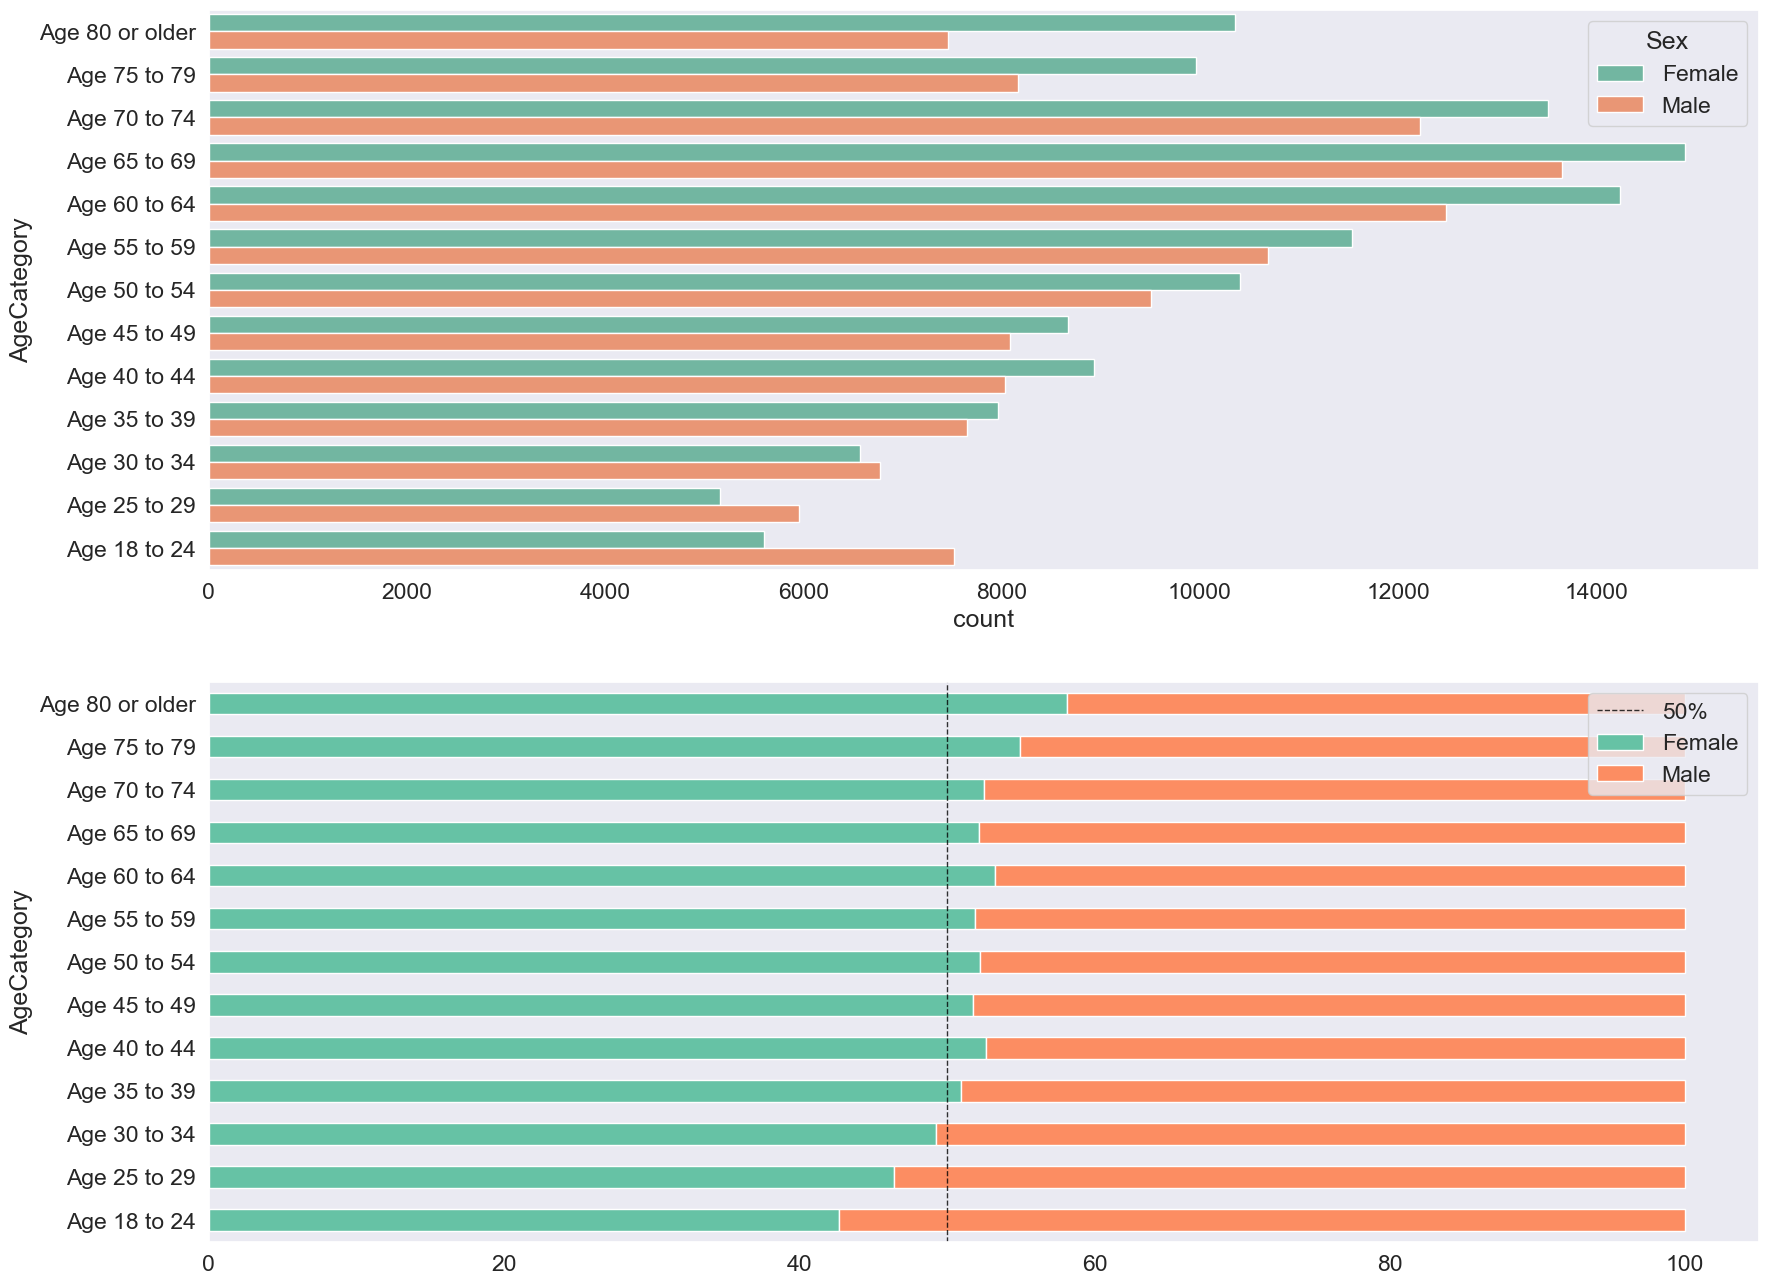

In [22]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 16))
order_of_bars_age = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 
    'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 
    'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'
    ]
sns.countplot(y='AgeCategory', hue="Sex", data=data, order=order_of_bars_age[::-1], ax=ax1)
total = data.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_age)
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax.axvline(x=50, color='black', linestyle='--', linewidth=1, alpha=0.8, label='50%')
plt.legend()



### Relación entre peso (WeightInKilograms), altura (HeightInMeters) y el índice de masa comporal (BMI)

<Axes: xlabel='WeightInKilograms', ylabel='HeightInMeters'>

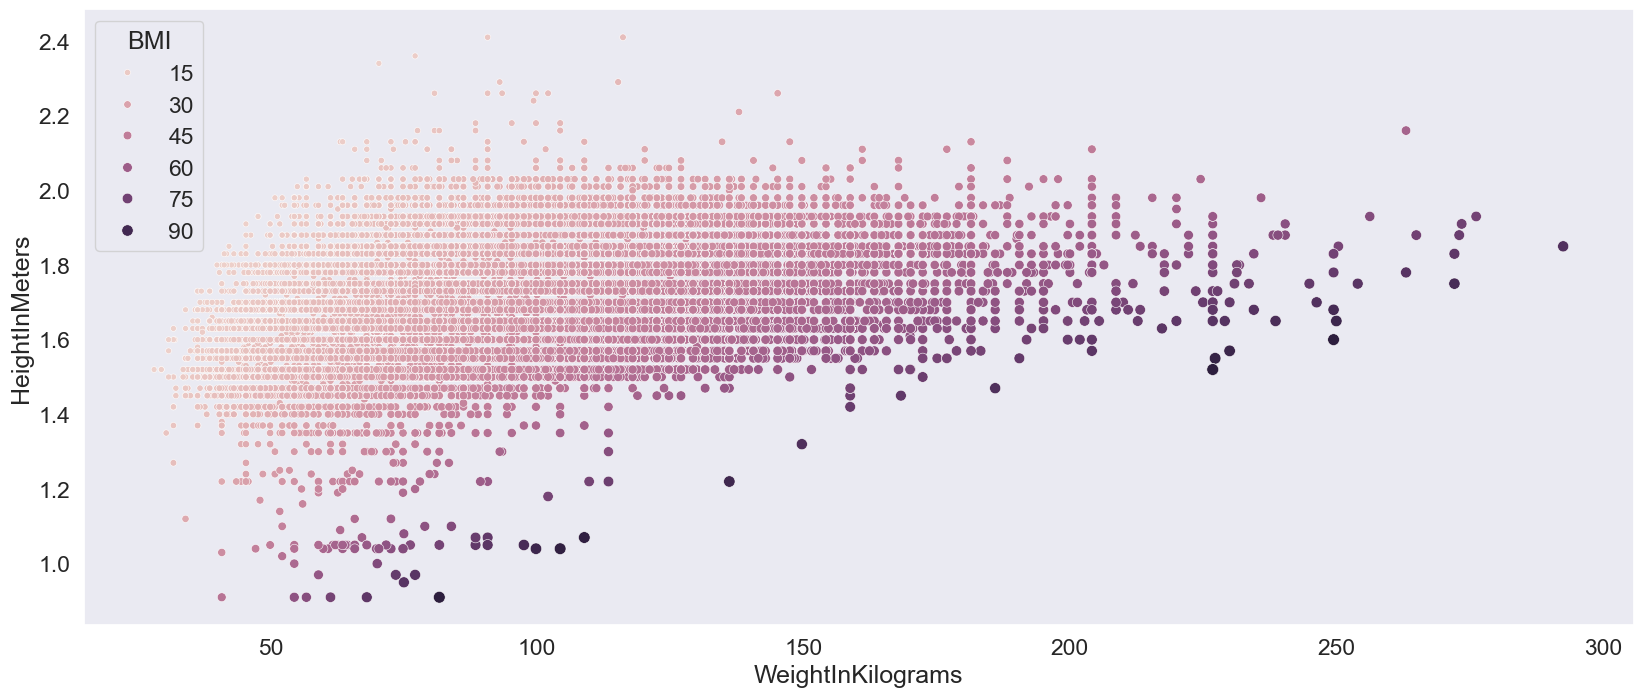

In [23]:
sns.scatterplot(data=data, y='HeightInMeters', x='WeightInKilograms', hue='BMI', size="BMI")


### Casos de BMI mayor a 30 (Obesidad)

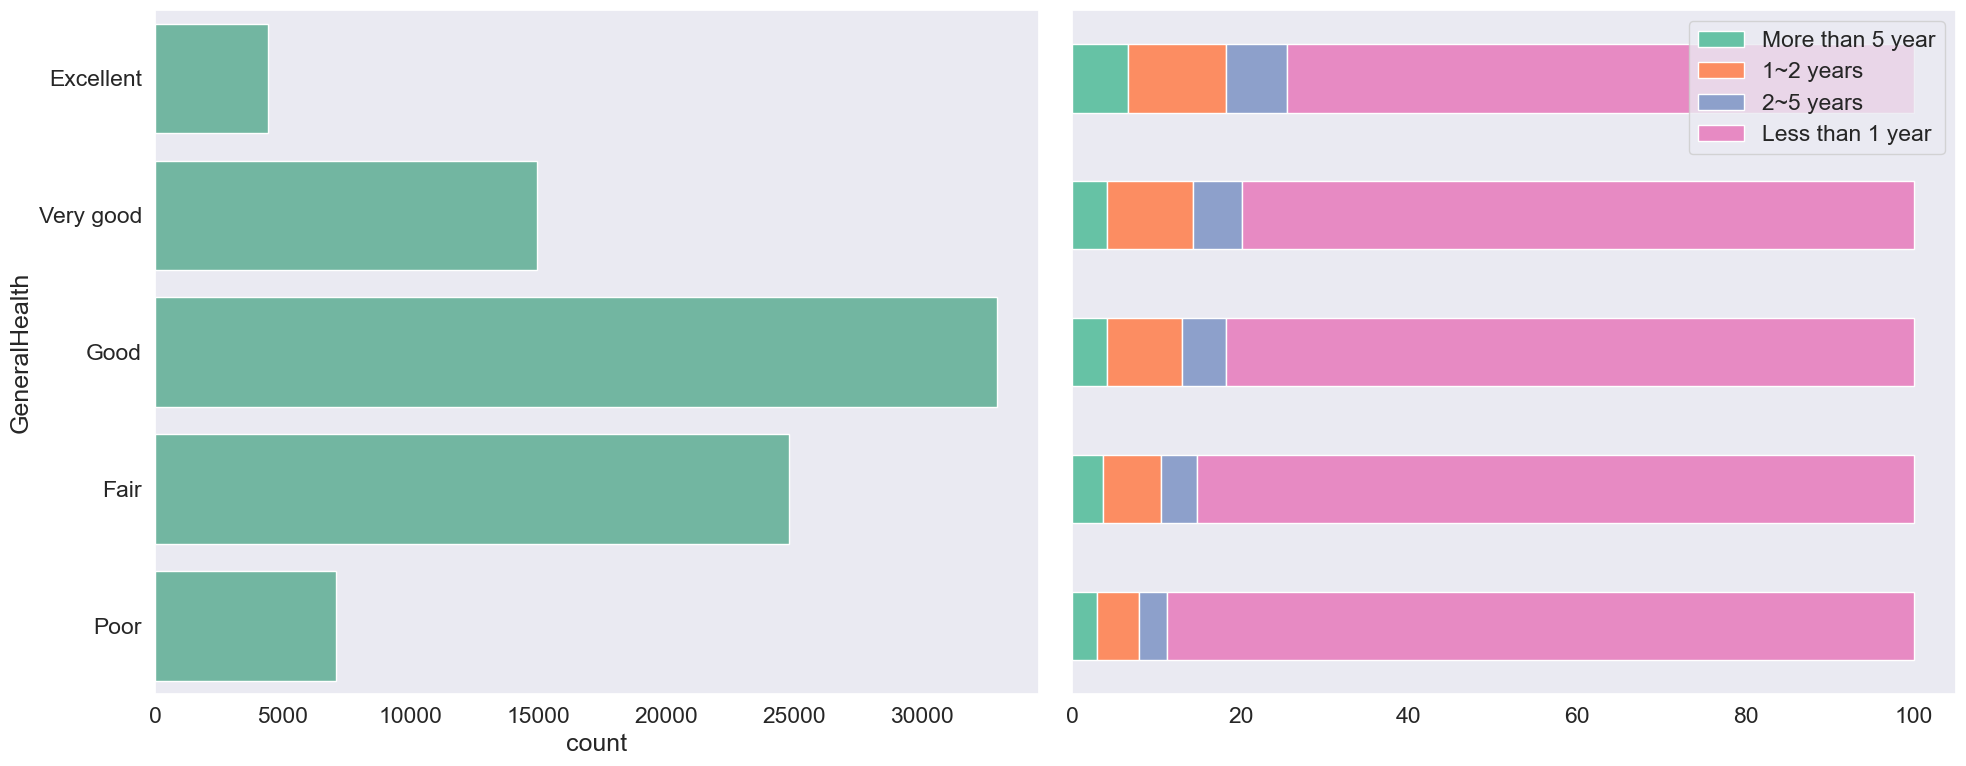

In [24]:
BMI30 = data.loc[data['BMI'] > 30 ] # Obesidad (segun fuentes)
BMI = data.loc[data['BMI'] <= 30 ]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
order_of_bars_feel = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
legend = ['Within past year (anytime less than 12 months ago)',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)',
       '5 or more years ago']
legend_alias = ['More than 5 year', '1~2 years', '2~5 years', 'Less than 1 year']
sns.countplot(y='GeneralHealth', data=BMI30, order=order_of_bars_feel,ax=ax1)
total = data.groupby(['GeneralHealth','LastCheckupTime']).size().unstack(fill_value=0)
total = total.div(total.sum(axis=1), axis=0) * 100
total = total.reindex(order_of_bars_feel[::-1])
total[legend]
ax = total.plot(kind='barh', stacked=True, ax=ax2)
ax2.legend(legend_alias, loc='upper right')
fig.tight_layout()



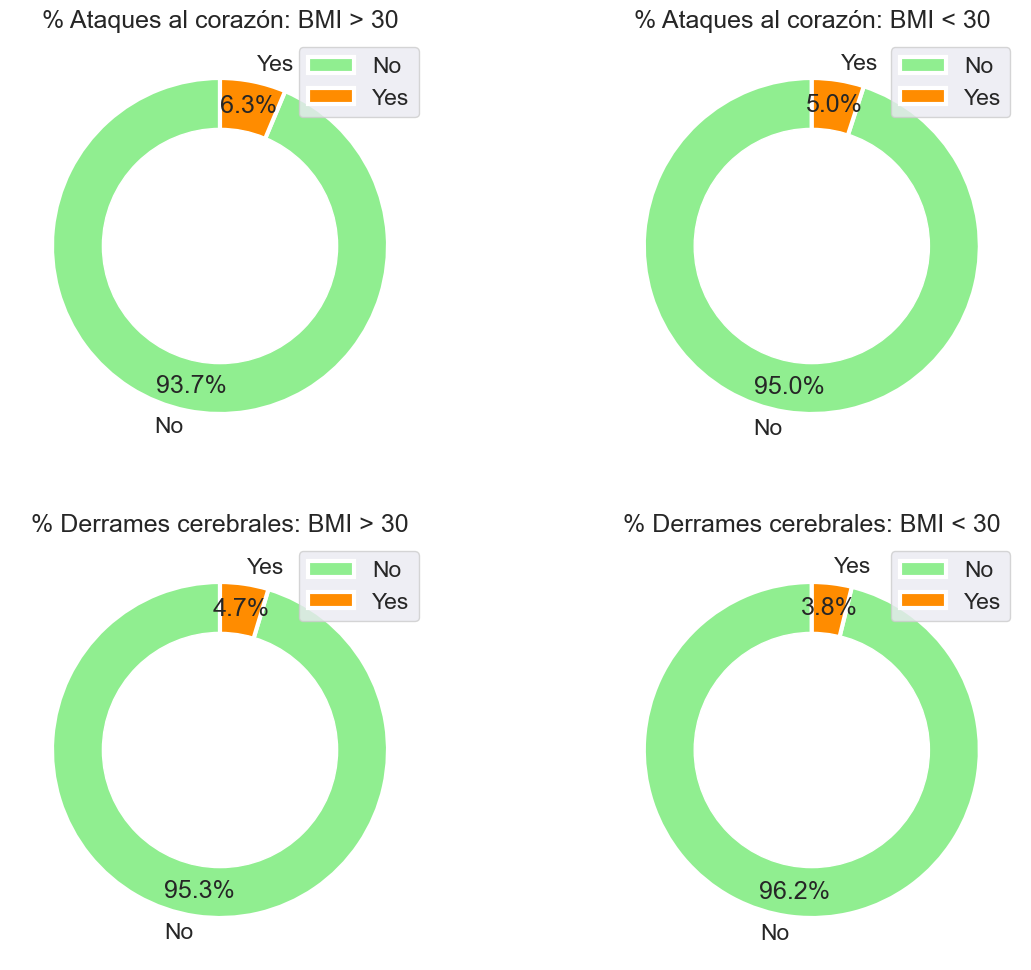

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(14,12))
colors = ['lightgreen', 'darkorange']

heart_attack = BMI30.groupby(['HadHeartAttack']).size()
ax1.pie(heart_attack, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.legend(labels=['No', 'Yes'], loc='upper right')
ax1.set_title('% Ataques al corazón: BMI > 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax1.add_artist(my_circle)

heart_attack = BMI.groupby(['HadHeartAttack']).size()
ax2.pie(heart_attack, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax2.legend(labels=['No', 'Yes'], loc='upper right')
ax2.set_title('% Ataques al corazón: BMI < 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax2.add_artist(my_circle)

stroke = BMI30.groupby(['HadStroke']).size()
ax3.pie(stroke, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax3.legend(labels=['No', 'Yes'], loc='upper right')
ax3.set_title('% Derrames cerebrales: BMI > 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax3.add_artist(my_circle)

stroke = BMI.groupby(['HadStroke']).size()
ax4.pie(stroke, labels=['No', 'Yes'], colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85,  
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax4.legend(labels=['No', 'Yes'], loc='upper right')
ax4.set_title('% Derrames cerebrales: BMI < 30')
my_circle = plt.Circle( (0,0), 0.7, color='white')
ax4.add_artist(my_circle)

<Axes: xlabel='BMI', ylabel='Count'>

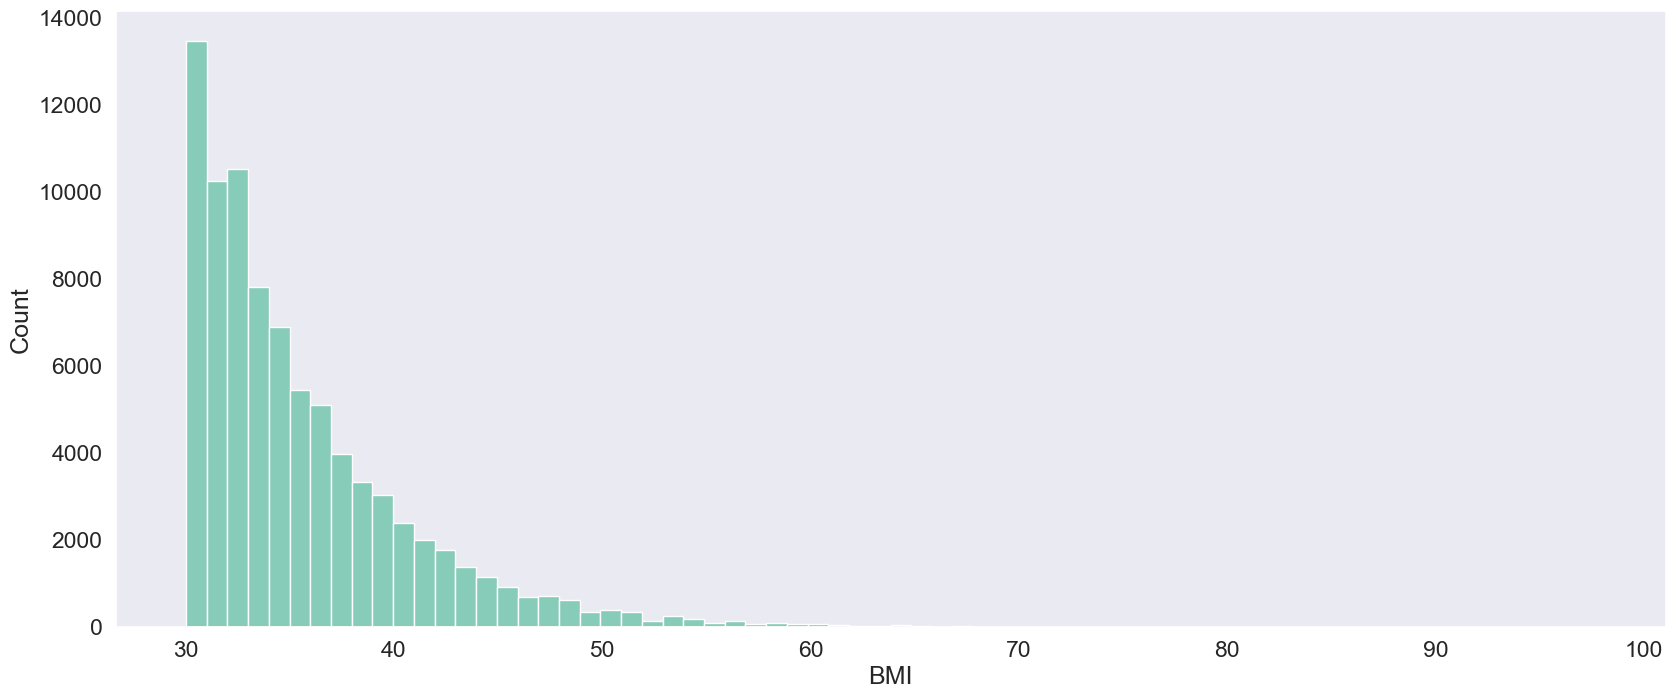

In [26]:
sns.histplot(data=BMI30, x="BMI", binwidth=1)

### Casos de 30 dias se sentirse mal (Fisica y mentalmente)

<Axes: xlabel='MentalHealthDays', ylabel='Count'>

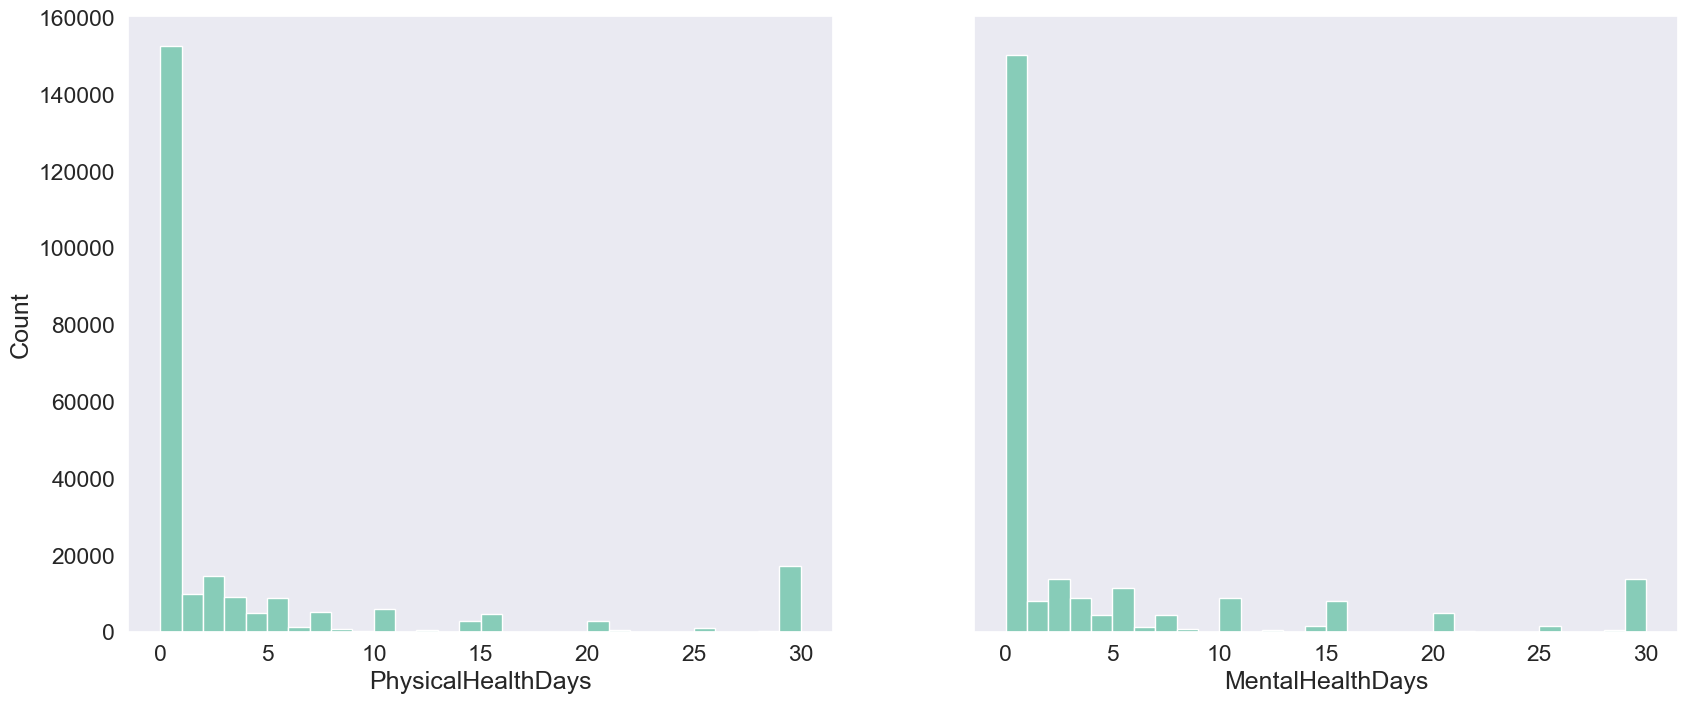

In [27]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True)

sns.histplot(data=data, x='PhysicalHealthDays', ax=ax1, binwidth=1)
sns.histplot(data=data, x='MentalHealthDays', ax=ax2, binwidth=1)

In [28]:
PLUS30 = data.loc[data["PhysicalHealthDays"] >= 20]
PLUS30 = PLUS30.loc[PLUS30["MentalHealthDays"] >= 20]

MINUS30 = data.loc[data["PhysicalHealthDays"] < 20]
MINUS30 = MINUS30.loc[MINUS30["MentalHealthDays"] < 20]

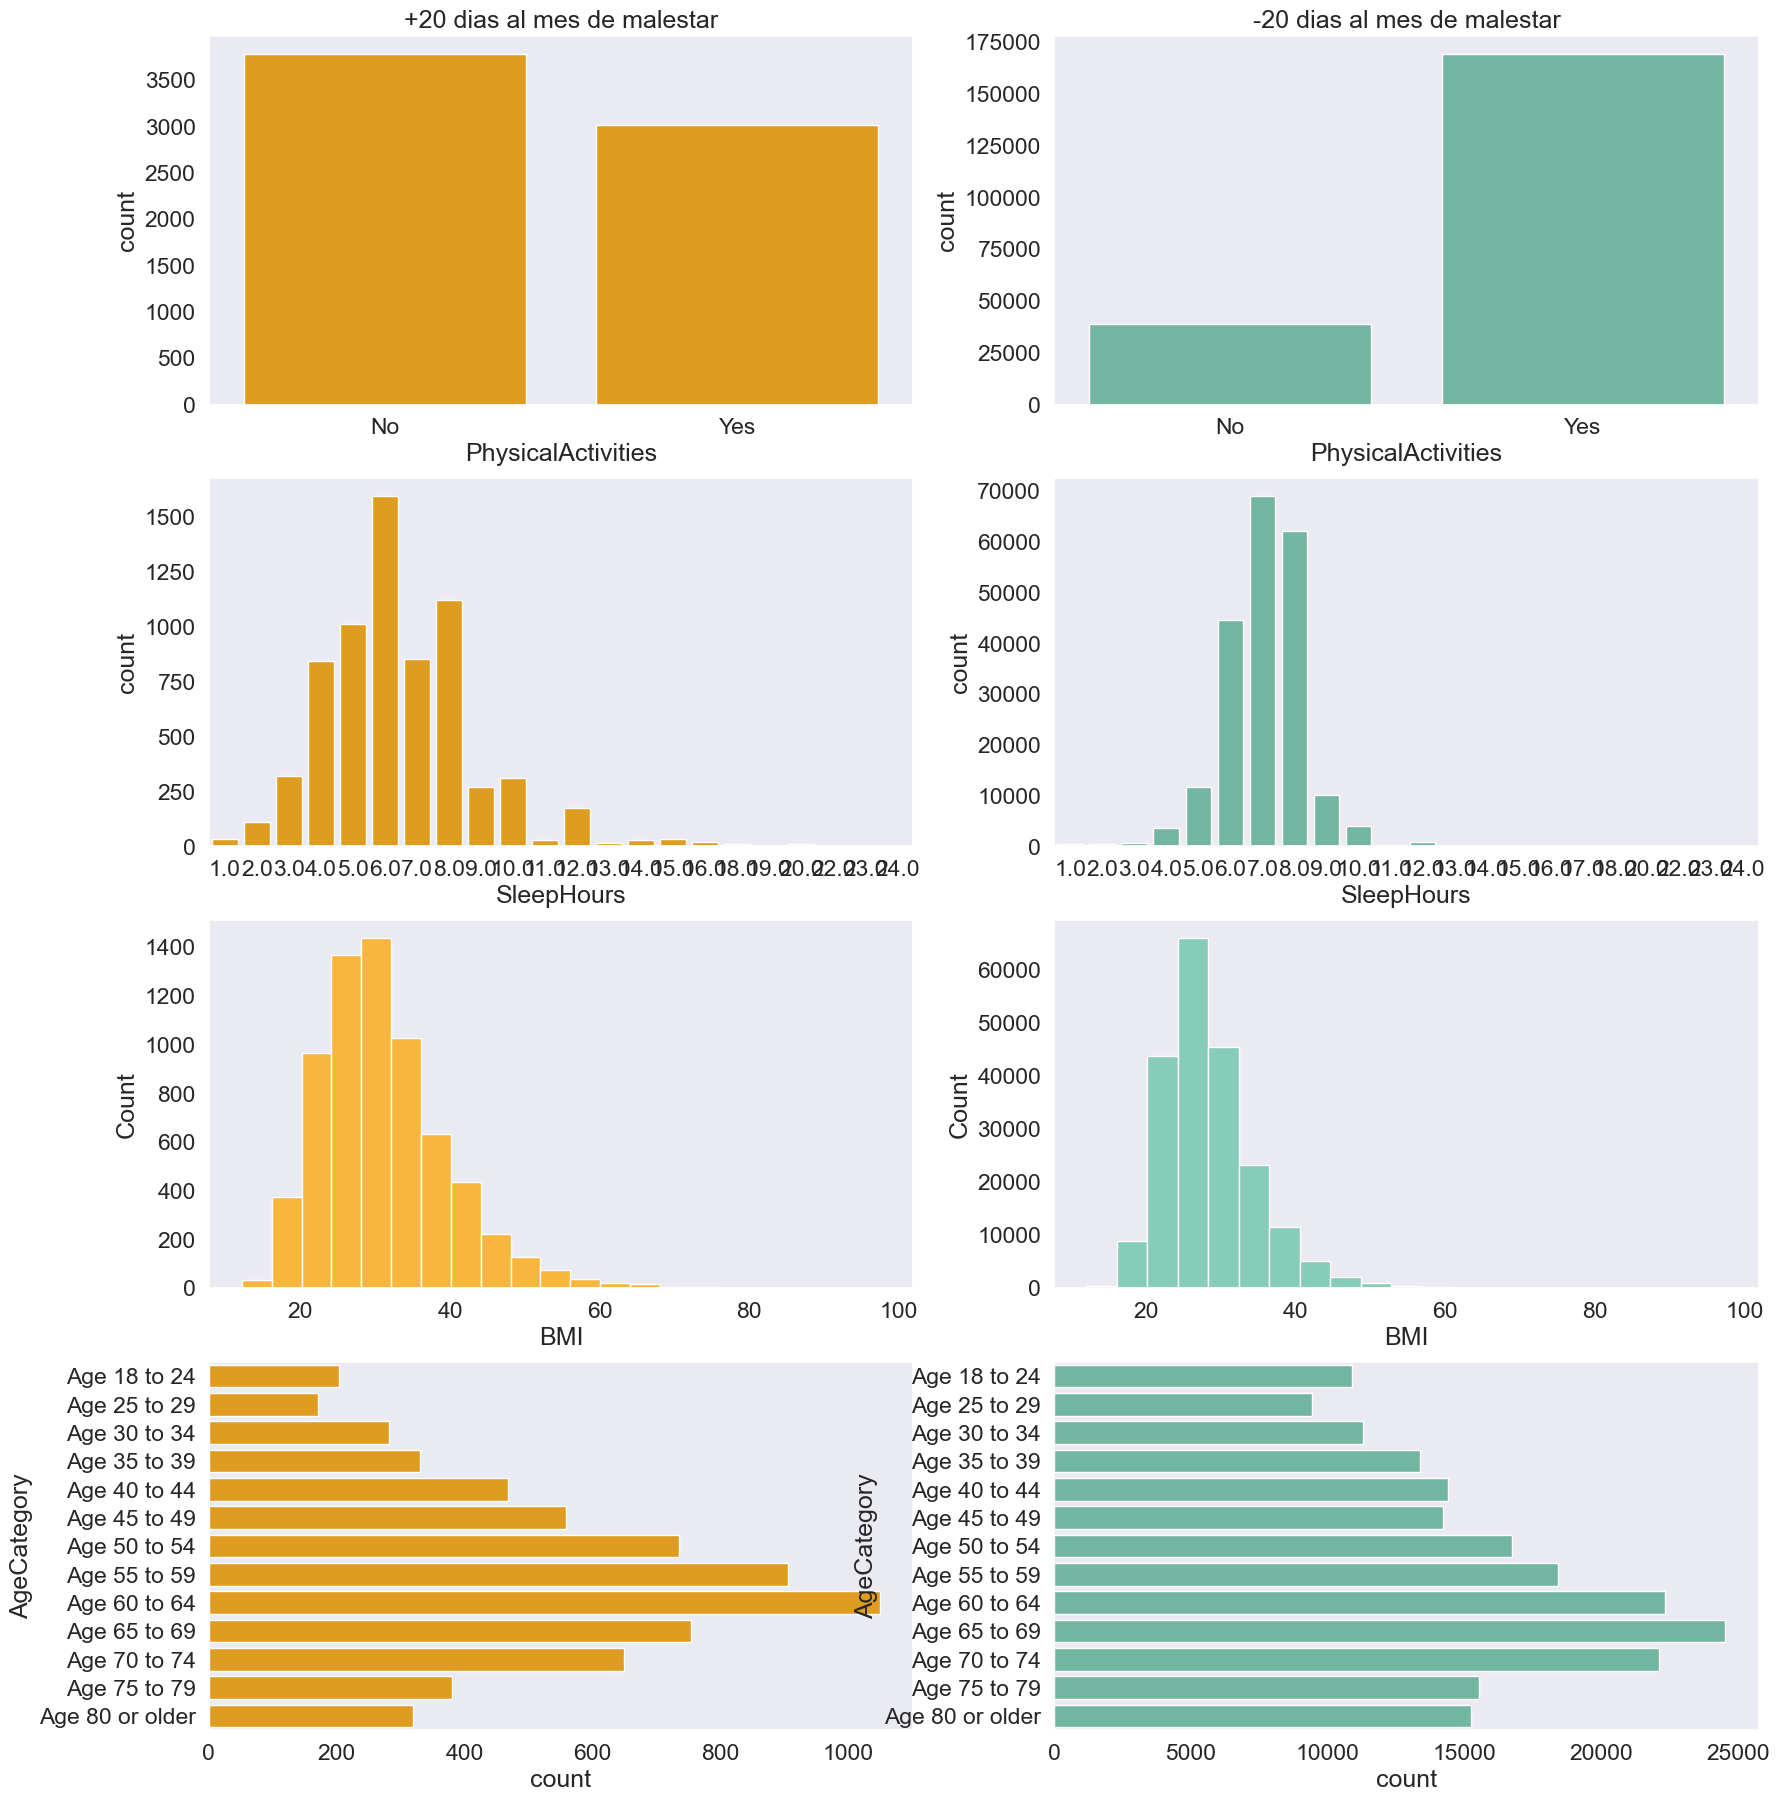

In [29]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,22))


ax1.set_title("+20 dias al mes de malestar")
sns.countplot(data=PLUS30, x="PhysicalActivities", ax=ax1, color='orange')
sns.countplot(data=PLUS30, x="SleepHours", ax=ax3, color='orange')
sns.histplot(data=PLUS30, x="BMI", ax=ax5, binwidth=4, color='orange')
sns.countplot(data=PLUS30, y="AgeCategory", ax=ax7, order=order_of_bars_age, color='orange')

ax2.set_title("-20 dias al mes de malestar")
sns.countplot(data=MINUS30, x="PhysicalActivities", ax=ax2, order=['No', 'Yes'])
sns.countplot(data=MINUS30, x="SleepHours", ax=ax4)
sns.histplot(data=MINUS30, x="BMI", ax=ax6, binwidth=4)
sns.countplot(data=MINUS30, y="AgeCategory", ax=ax8, order=order_of_bars_age)

ax5.sharex(ax6)

### Jovenes con mas dias de malestar mental

PhysicalHealthDays  MentalHealthDays  TotalDays  \
AgeCategory                                                        
Age 18 to 24                33793.0           98632.0   132425.0   
Age 25 to 29                28709.0           73341.0   102050.0   
Age 30 to 34                38871.0           82983.0   121854.0   
Age 35 to 39                46158.0           86532.0   132690.0   
Age 40 to 44                58034.0           89336.0   147370.0   
Age 45 to 49                63711.0           80879.0   144590.0   
Age 50 to 54                84874.0           91579.0   176453.0   
Age 55 to 59               107393.0           94551.0   201944.0   
Age 60 to 64               131382.0           99006.0   230388.0   
Age 65 to 69               126267.0           83004.0   209271.0   
Age 70 to 74               117271.0           68191.0   185462.0   
Age 75 to 79                87621.0           42771.0   130392.0   
Age 80 or older             89287.0           34403.0   123690.0   

                 PhysicalHealthDays %  MentalHealthDays %  
AgeCategory                                                
Age 18 to 24                25.518595           74.481405  
Age 25 to 29                28.132288           71.867712  
Age 30 to 34                31.899650           68.100350  
Age 35 to 39                34.786344           65.213656  
Age 40 to 44                39.379792           60.620208  
Age 45 to 49                44.063213           55.936787  
Age 50 to 54                48.100061           51.899939  
Age 55 to 59                53.179594           46.820406  
Age 60 to 64                57.026408           42.973592  
Age 65 to 69                60.336597           39.663403  
Age 70 to 74                63.231821           36.768179  
Age 75 to 79                67.198141           32.801859  
Age 80 or older             72.186110           27.813890

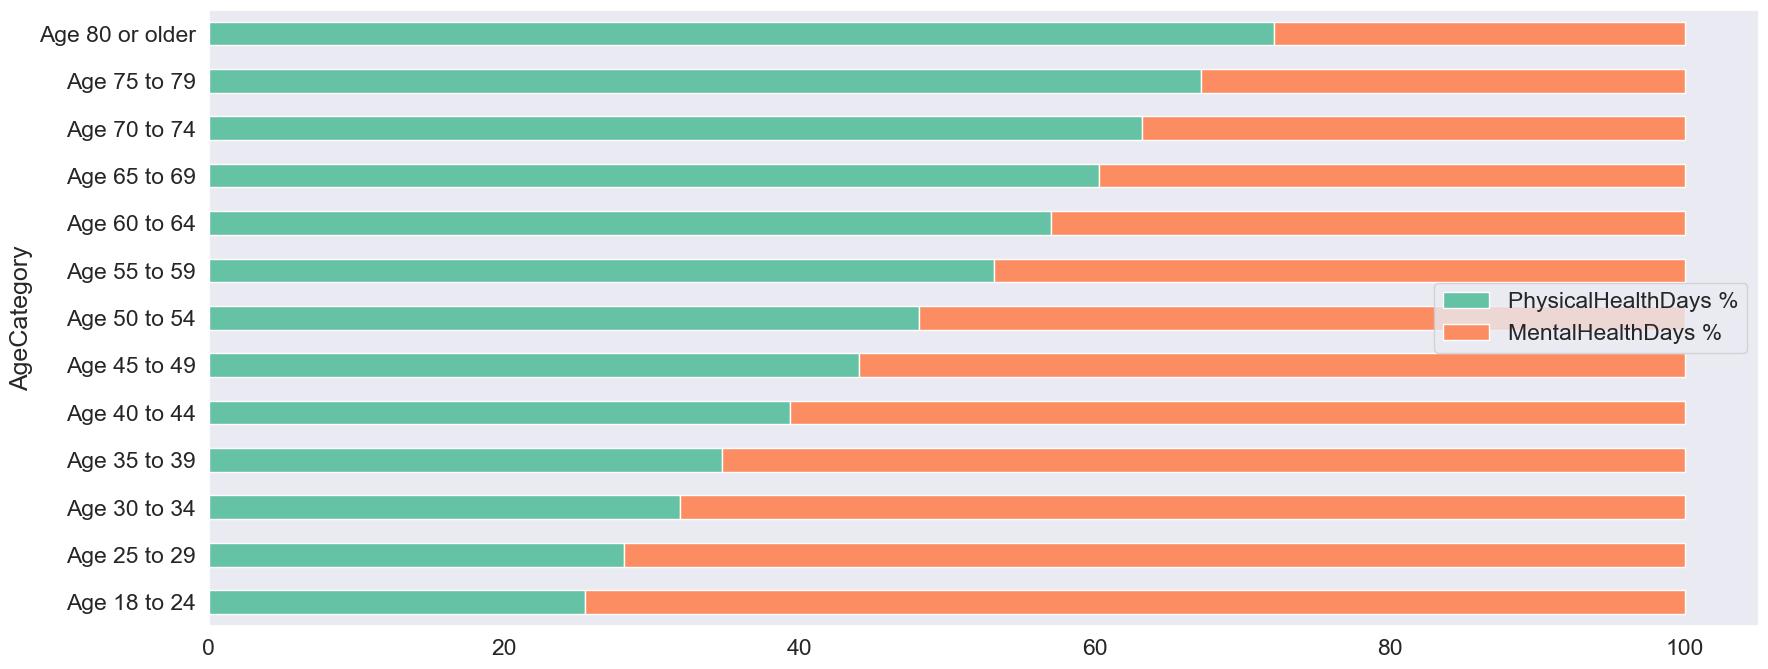

In [30]:
small_data = data[["AgeCategory", "PhysicalHealthDays", "MentalHealthDays"]]
grouped_data = small_data.groupby('AgeCategory').sum()
grouped_data["TotalDays"] = grouped_data["PhysicalHealthDays"] + grouped_data["MentalHealthDays"]
grouped_data["PhysicalHealthDays %"] = grouped_data["PhysicalHealthDays"] / grouped_data["TotalDays"] * 100
grouped_data["MentalHealthDays %"] = grouped_data["MentalHealthDays"] / grouped_data["TotalDays"] * 100

grouped_data[["PhysicalHealthDays %", "MentalHealthDays %"]].plot(kind="barh", stacked=True)
grouped_data

In [31]:
mental_data = data.copy()
mental_data['MoreMentalHealthDays'] = mental_data['MentalHealthDays'] > mental_data['PhysicalHealthDays']
mental_data['MoreMentalHealthDays'] = mental_data['MoreMentalHealthDays'].astype(int)

In [32]:
yes = mental_data[mental_data["MoreMentalHealthDays"] == 1]
no = mental_data[mental_data["MoreMentalHealthDays"] == 0]


<Axes: xlabel='AlcoholDrinkers', ylabel='count'>

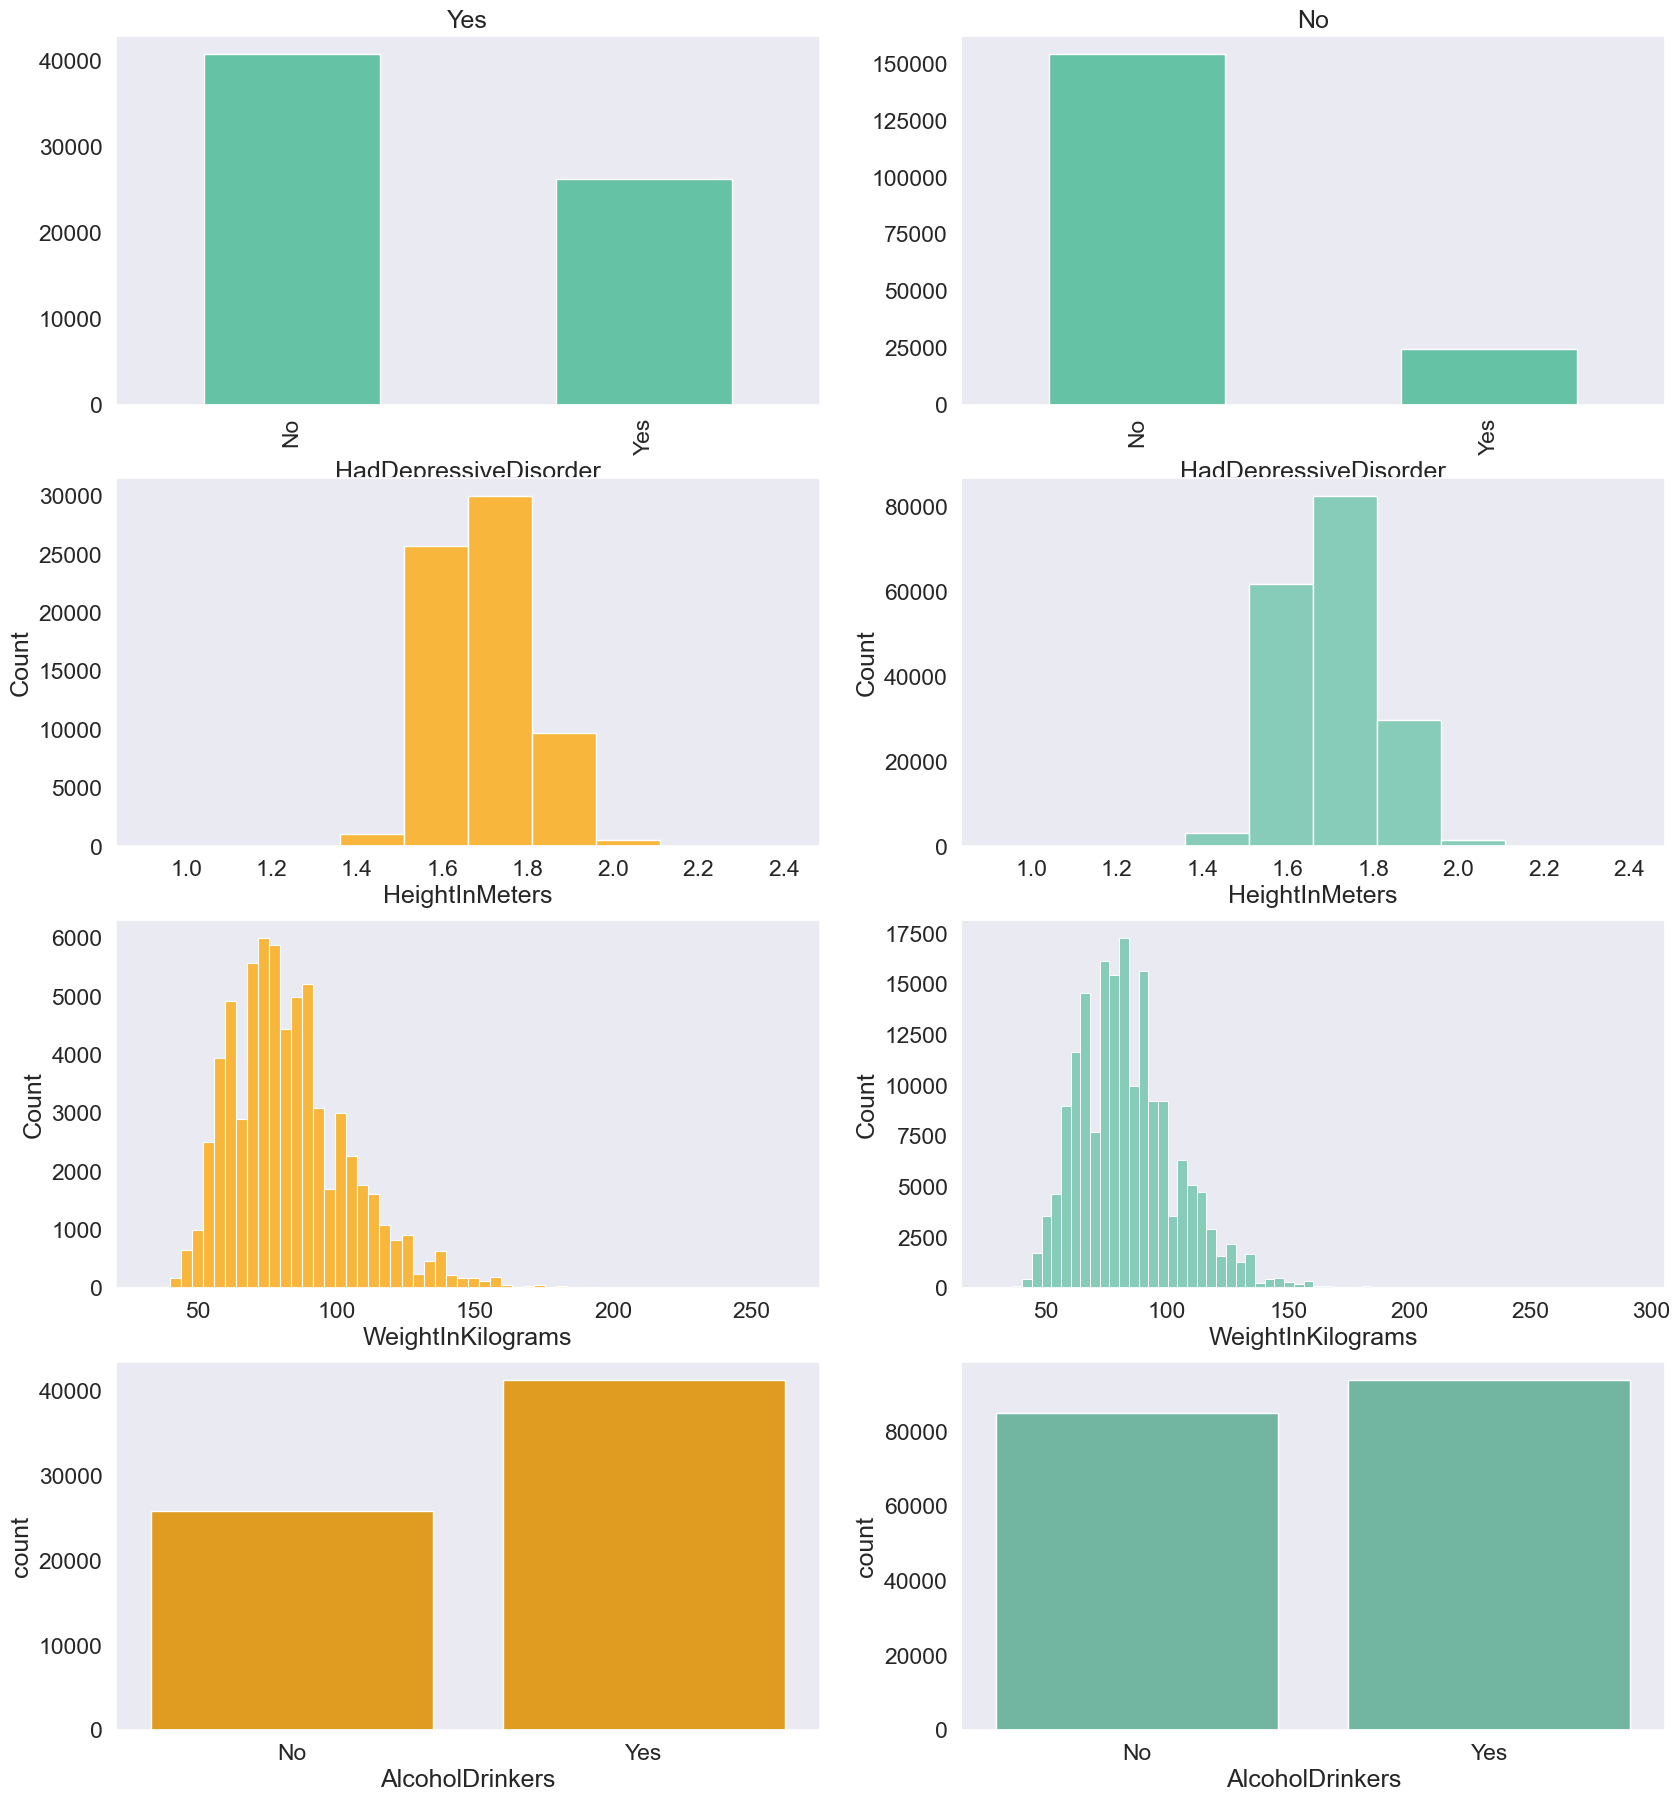

In [33]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,22))


ax1.set_title("Yes")
yes.groupby(["HadDepressiveDisorder"]).size().plot(kind='bar', ax=ax1)
sns.histplot(data=yes, x="HeightInMeters", ax=ax3, color='orange', bins=10)
sns.histplot(data=yes, x="WeightInKilograms", ax=ax5, binwidth=4, color='orange')
sns.countplot(data=yes, x="AlcoholDrinkers", ax=ax7, color='orange')

ax2.set_title("No")
no.groupby(["HadDepressiveDisorder"]).size().plot(kind='bar', ax=ax2)
sns.histplot(data=no, x="HeightInMeters", ax=ax4, bins=10)
sns.histplot(data=no, x="WeightInKilograms", ax=ax6, binwidth=4)
sns.countplot(data=no, x="AlcoholDrinkers", ax=ax8)

# Analisis Estadístico

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [66]:
# quito las columnas innecesarias
drop_columns = ["State", "LastCheckupTime", "RemovedTeeth", "ChestScan", "SmokerStatus", "ECigaretteUsage", "HadDiabetes", "RaceEthnicityCategory", "BMI", "TetanusLast10Tdap", "CovidPos", "FluVaxLast12", "PneumoVaxEver"]
model_data = data.drop(columns=drop_columns)
# convierto las columnas Yes/No a binarias
yes_no_columns = [col for col in model_data.columns if data[col].isin(['Yes', 'No']).any()]
model_data[yes_no_columns] = model_data[yes_no_columns].replace({'Yes': 1, 'No': 0})

# convierto dos columnas categoricas a columnas binarias
new_cols = pd.DataFrame()
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(model_data[['GeneralHealth']])
encoded_cols = encoder.transform(model_data[['GeneralHealth']])
encoded_data = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['GeneralHealth']))
new_cols = pd.concat([new_cols, encoded_data], axis=1)
model_data = pd.concat([model_data, new_cols], axis=1)

new_cols = pd.DataFrame()
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(model_data[['Sex']])
encoded_cols = encoder.transform(model_data[['Sex']])
encoded_data = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Sex']))
new_cols = pd.concat([new_cols, encoded_data], axis=1)
model_data = pd.concat([model_data, new_cols], axis=1)
# me quedo con las categorias etareas menores
model_data = model_data.loc[model_data["AgeCategory"] <= "Age 40 to 44"]
model_data["y"] = model_data["HadDepressiveDisorder"]
# model_data.drop(columns=["GeneralHealth", "Sex", "AgeCategory", "HadDepressiveDisorder"], inplace=True)

model_data

Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
8         Male          Good                 2.0               0.0   
49      Female          Good                 0.0               0.0   
75      Female     Very good                 0.0               0.0   
132       Male          Good                15.0              25.0   
157     Female     Very good                 1.0               0.0   
...        ...           ...                 ...               ...   
245998  Female          Good                 2.0              10.0   
246005  Female     Excellent                 0.0               0.0   
246007  Female     Very good                 0.0               0.0   
246013    Male     Excellent                 0.0               7.0   
246018  Female          Fair                 0.0               7.0   

        PhysicalActivities  SleepHours  HadHeartAttack  HadAngina  HadStroke  \
8                        0         6.0               0          0          0   
49                       1         6.0               0          0          0   
75                       0         5.0               0          0          0   
132                      1         6.0               0          0          0   
157                      1         7.0               0          0          0   
...                    ...         ...             ...        ...        ...   
245998                   1         7.0               0          0          0   
246005                   1         8.0               0          0          0   
246007                   1         7.0               0          0          0   
246013                   0         4.0               0          0          0   
246018                   1         7.0               0          0          0   

        HadAsthma  HadSkinCancer  HadCOPD  HadDepressiveDisorder  \
8               0              0        0                      0   
49              0              0        1                      0   
75              0              0        0                      0   
132             0              1        0                      1   
157             0              0        0                      0   
...           ...            ...      ...                    ...   
245998          0              0        0                      0   
246005          0              0        0                      0   
246007          0              0        0                      0   
246013          0              0        0                      1   
246018          0              0        0                      1   

        HadKidneyDisease  HadArthritis  DeafOrHardOfHearing  \
8                      0             1                    1   
49                     0             0                    0   
75                     0             0                    0   
132                    1             0                    0   
157                    0             0                    0   
...                  ...           ...                  ...   
245998                 0             0                    0   
246005                 0             0                    0   
246007                 0             0                    0   
246013                 0             0                    0   
246018                 0             0                    0   

        BlindOrVisionDifficulty  DifficultyConcentrating  DifficultyWalking  \
8                             0                        0                  0   
49                            0                        0                  1   
75                            0                        0                  0   
132                           0                        1                  0   
157                           0                        0                  0   
...                         ...                      ...                ...   
245998                        0                        0                  0   
246

### Implementación del método PCA

In [38]:
x = model_data.drop(["GeneralHealth", "Sex", "AgeCategory", "HadDepressiveDisorder", "y"], axis=1)
y = model_data["y"]
nombres = x.columns

print("x: ", x.shape)
print("y: ", y.shape)
nombres

x:  (70164, 30)
y:  (70164,)


Index(['PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'HeightInMeters',
       'WeightInKilograms', 'AlcoholDrinkers', 'HIVTesting',
       'HighRiskLastYear', 'GeneralHealth_Excellent', 'GeneralHealth_Fair',
       'GeneralHealth_Good', 'GeneralHealth_Poor', 'GeneralHealth_Very good',
       'Sex_Female', 'Sex_Male'],
      dtype='object')

In [39]:
# estandarizo los valores de las X´s
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [40]:
pca = PCA()
pca.fit(x, y)
x_new = pca.transform(x)

[0.117, 0.091, 0.051, 0.049, 0.044, 0.042, 0.039, 0.036, 0.035, 0.033, 0.033, 0.032, 0.032, 0.031, 0.031, 0.029, 0.029, 0.029, 0.027, 0.027, 0.026, 0.026, 0.025, 0.02, 0.019, 0.018, 0.017, 0.012, 0.0, 0.0]


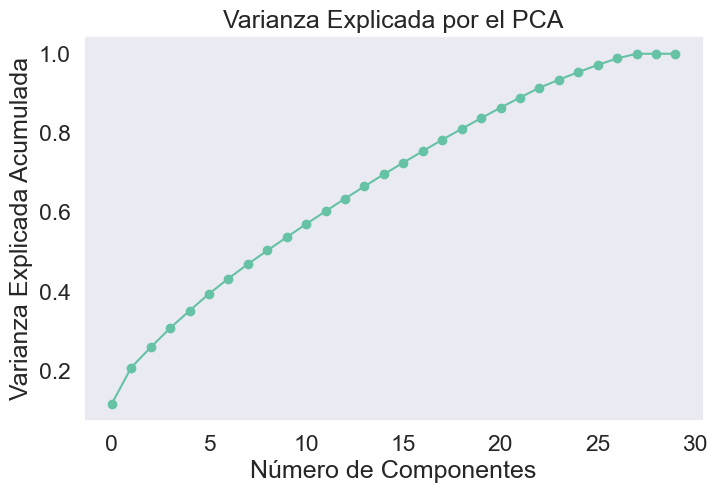

In [41]:
print([round(x,3) for x in pca.explained_variance_ratio_])
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por el PCA')
plt.show()

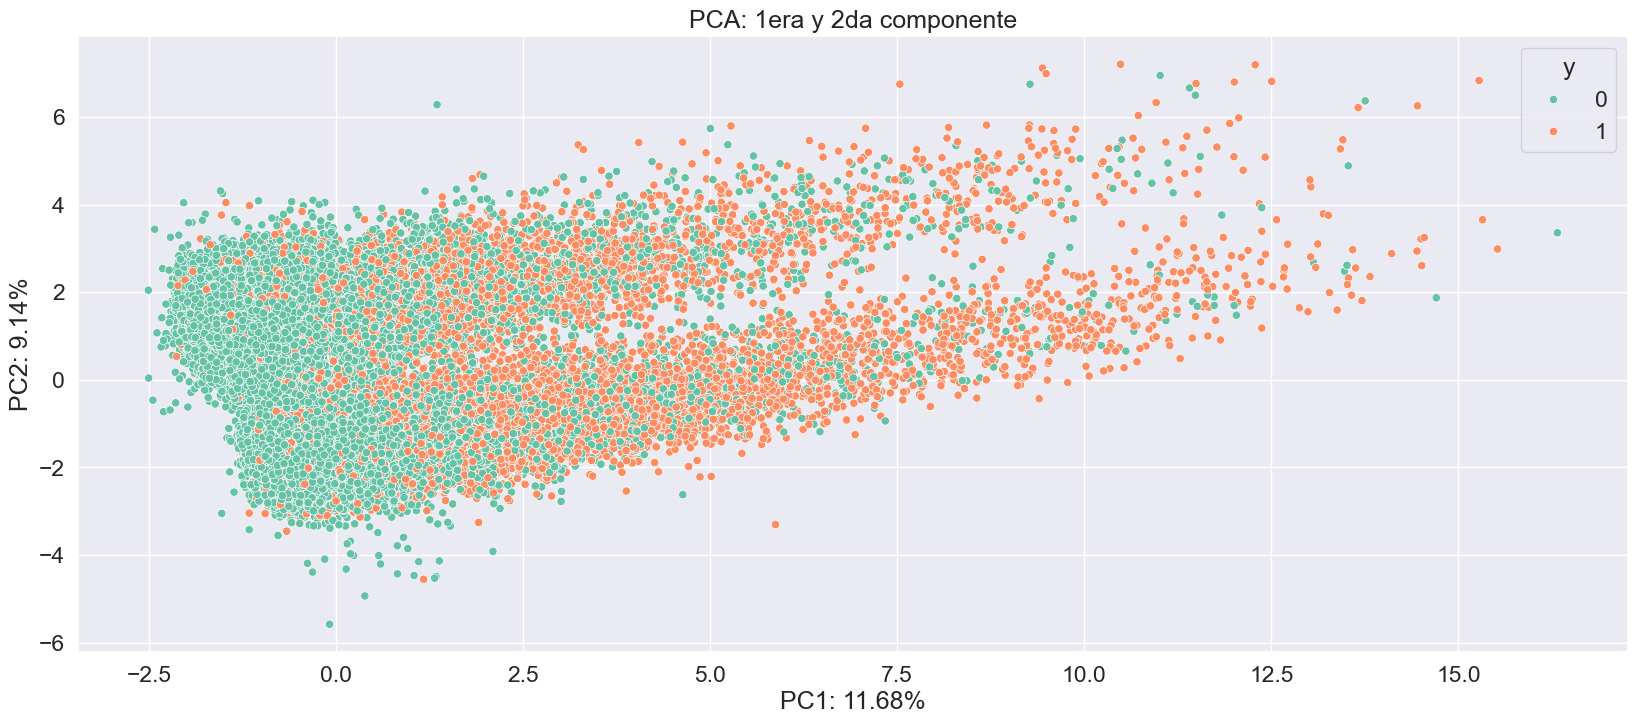

In [42]:
def myplot(score, y):
    x1 = score[:,0]
    x2 = score[:,1]
    sns.scatterplot(x=x1, y=x2, hue=y, alpha=1)

# grafico las primeras dos componentes principales 
myplot(x_new[:,0:2], model_data["y"])
vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)
plt.xlabel("PC{}: {}%".format(1, var1))
plt.ylabel("PC{}: {}%".format(2, var2))
plt.title("PCA: 1era y 2da componente")
plt.grid()
plt.show()

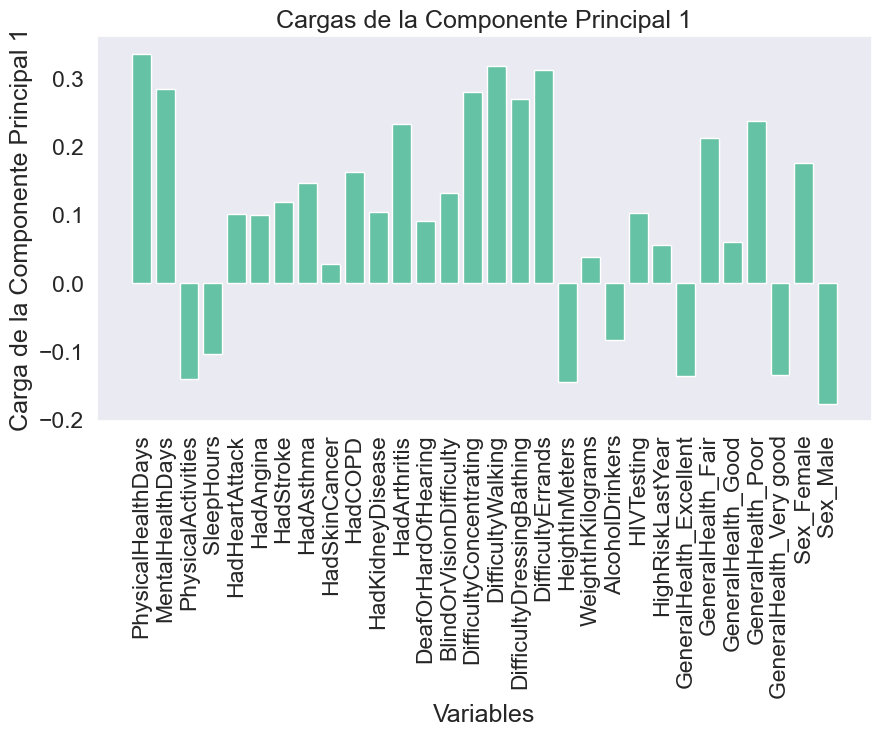

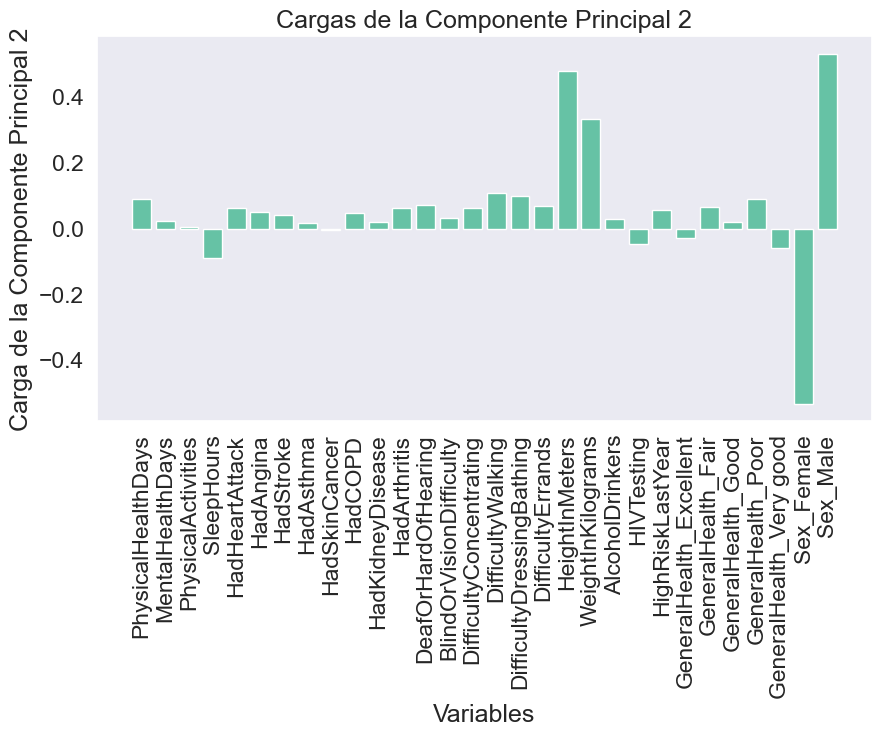

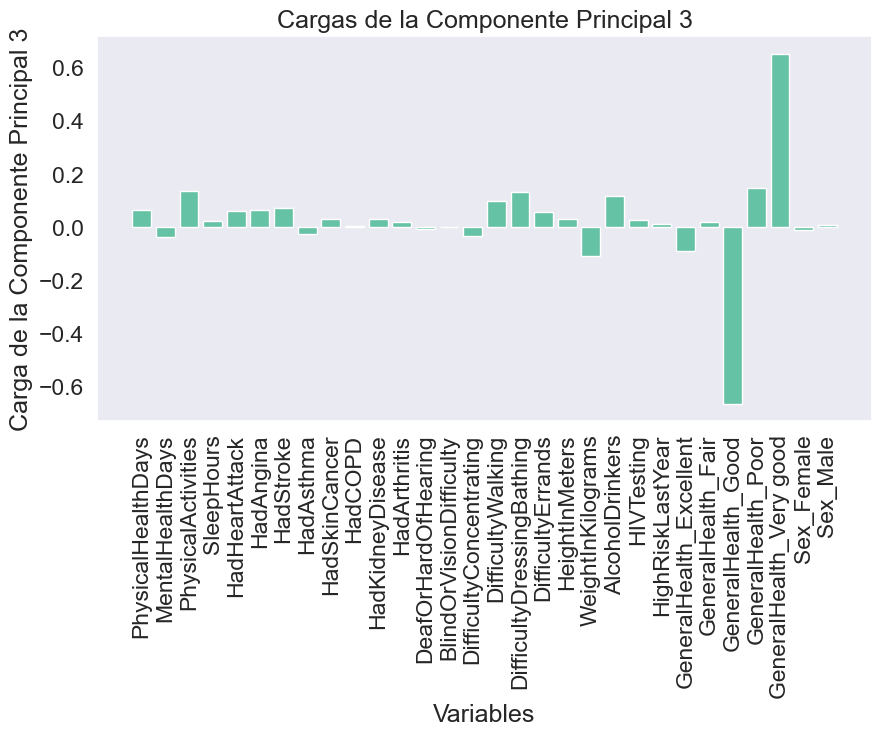

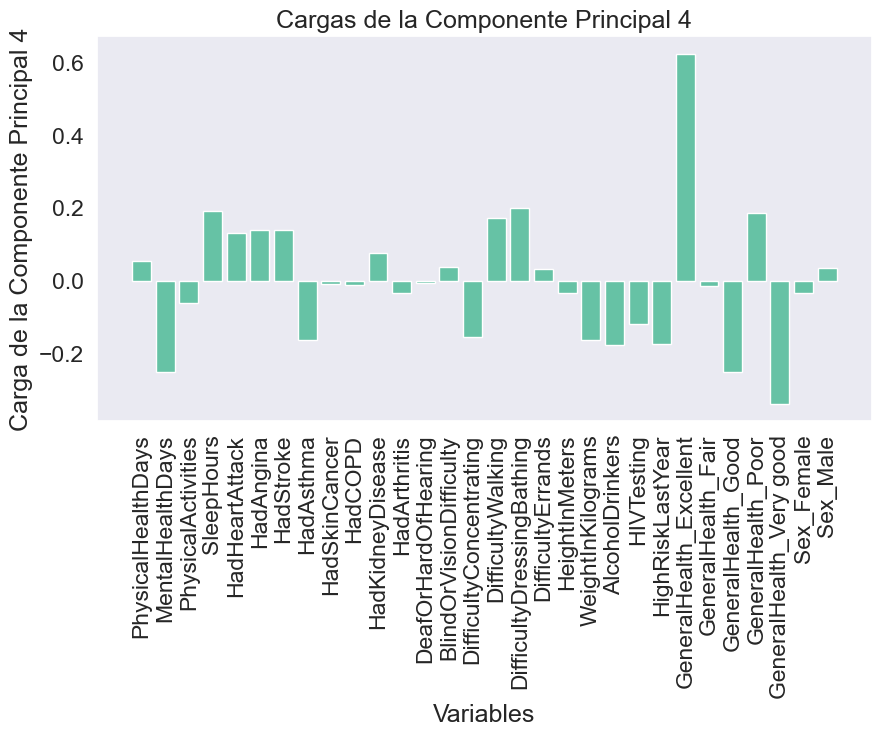

In [43]:
## Quitar algunas componentes
feature_names = nombres
for i, component in enumerate(pca.components_[:4]):
    plt.figure(figsize=(10,5))
    plt.bar(nombres, component)
    plt.xlabel('Variables')
    plt.ylabel(f'Carga de la Componente Principal {i+1}')
    plt.title(f'Cargas de la Componente Principal {i+1}')
    plt.xticks(nombres, rotation=90)
    plt.show()

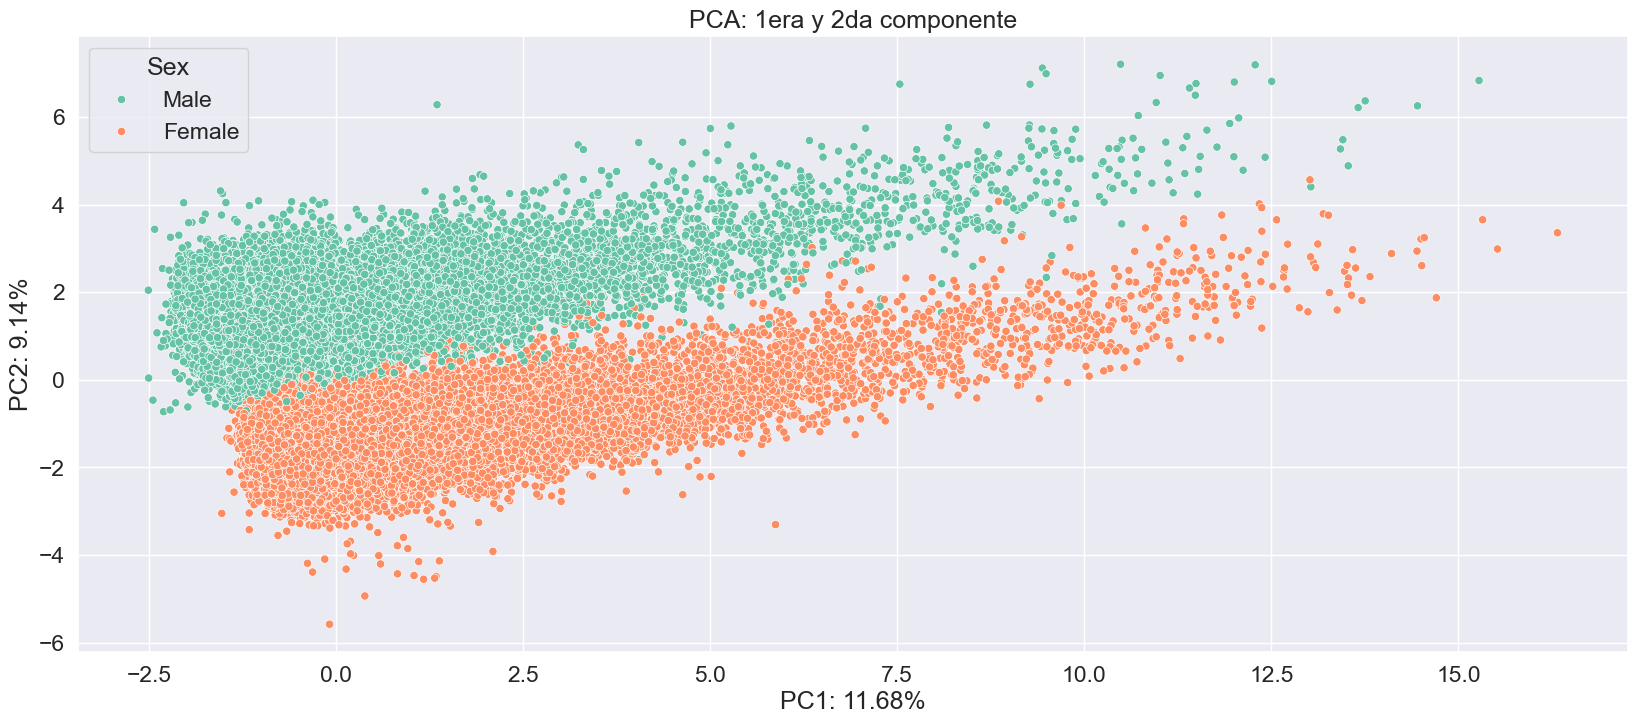

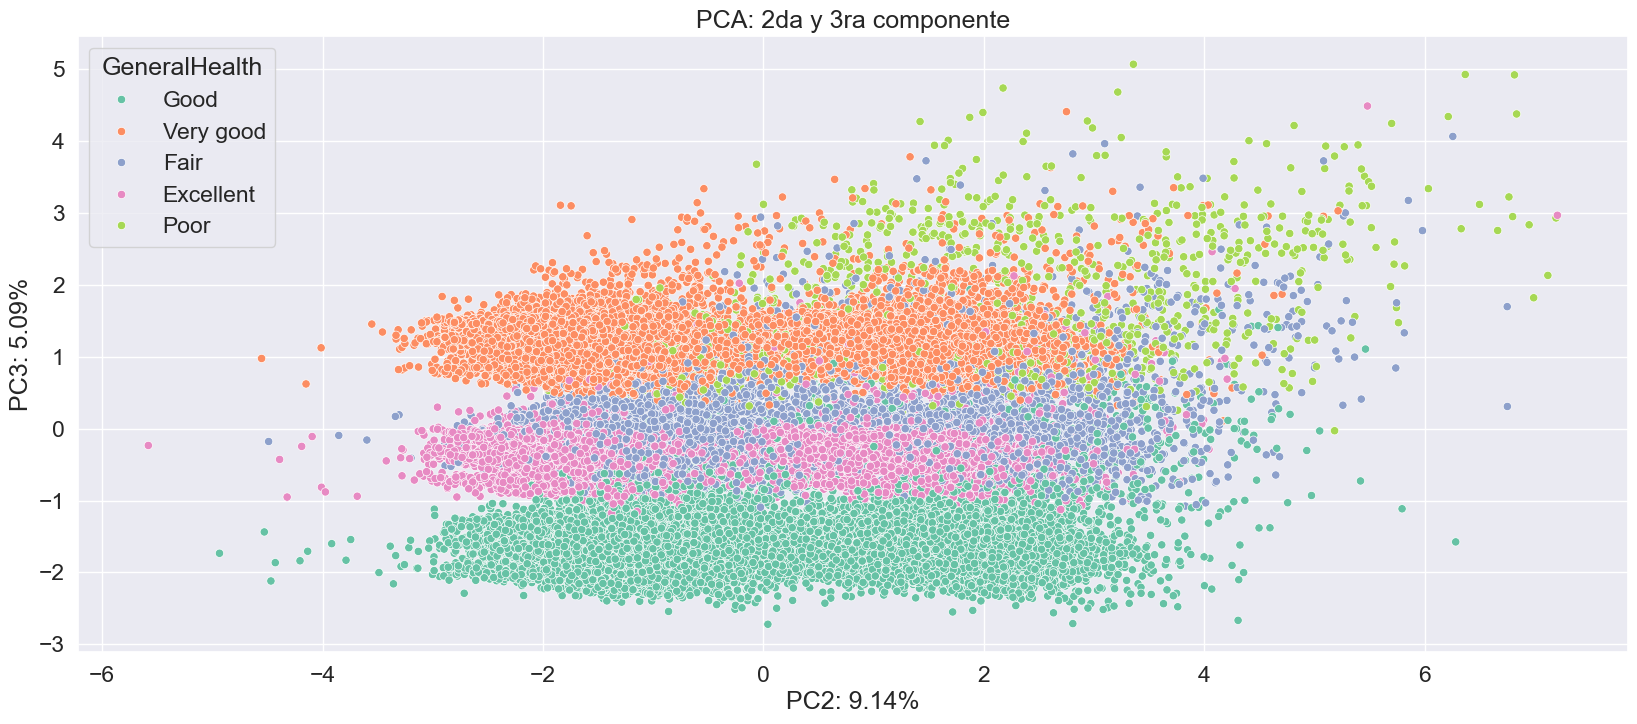

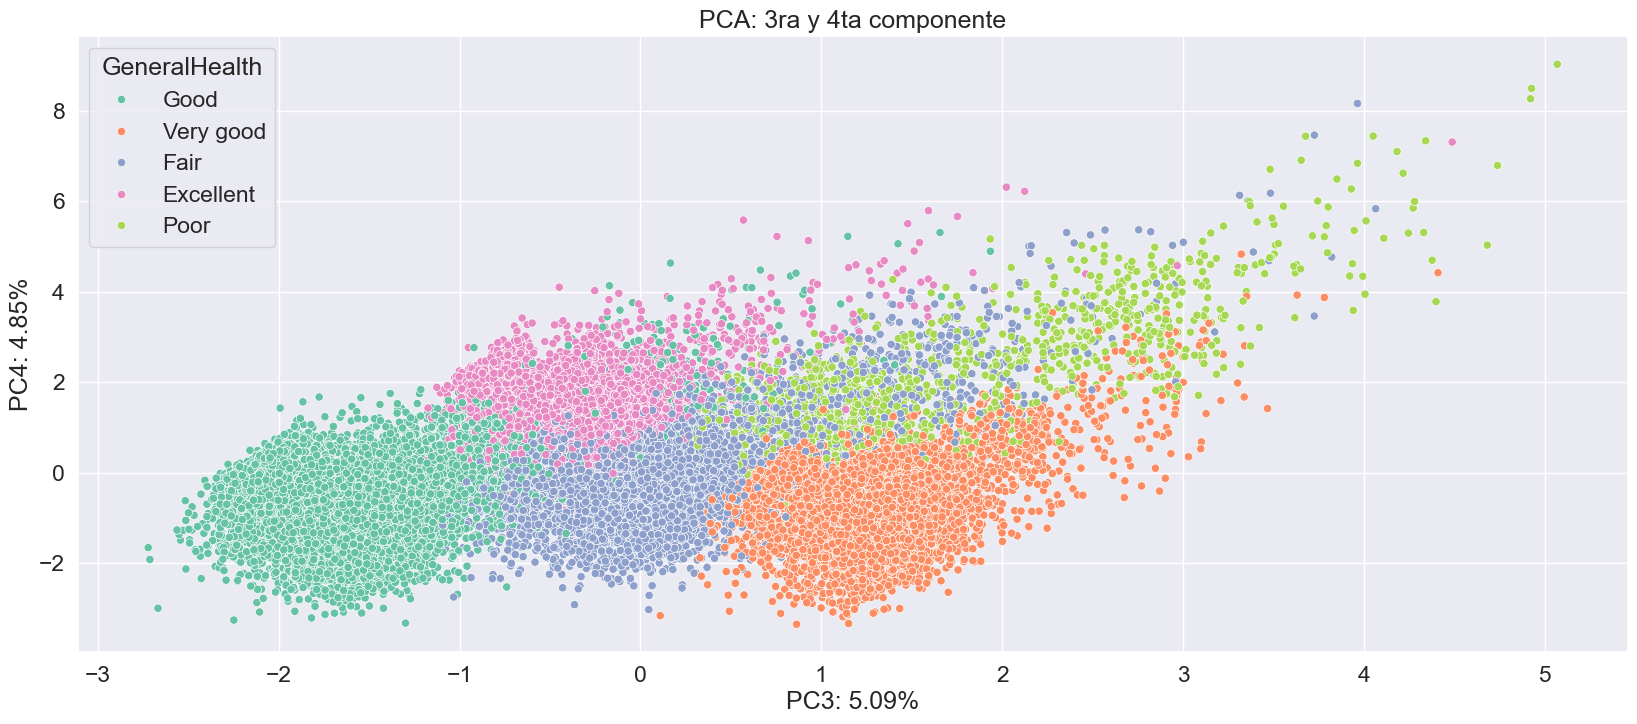

In [44]:
# grafico las primeras dos componentes principales 
myplot(x_new[:,0:2], model_data["Sex"])
vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)
plt.xlabel("PC{}: {}%".format(1, var1))
plt.ylabel("PC{}: {}%".format(2, var2))
plt.title("PCA: 1era y 2da componente")
plt.grid()
plt.show()

myplot(x_new[:,1:3], model_data["GeneralHealth"])
vars = pca.explained_variance_ratio_
var1 = round(100*vars[1],2)
var2 = round(100*vars[2],2)
plt.xlabel("PC{}: {}%".format(2, var1))
plt.ylabel("PC{}: {}%".format(3, var2))
plt.title("PCA: 2da y 3ra componente")
plt.grid()
plt.show()

myplot(x_new[:,2:4], y=model_data["GeneralHealth"])
vars = pca.explained_variance_ratio_
var1 = round(100*vars[2],2)
var2 = round(100*vars[3],2)
plt.xlabel("PC{}: {}%".format(3, var1))
plt.ylabel("PC{}: {}%".format(4, var2))
plt.title("PCA: 3ra y 4ta componente")
plt.grid()
plt.show()

### Modelo Árboles de Decisión

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     15525
           1       0.46      0.47      0.47      5525

    accuracy                           0.72     21050
   macro avg       0.64      0.64      0.64     21050
weighted avg       0.72      0.72      0.72     21050



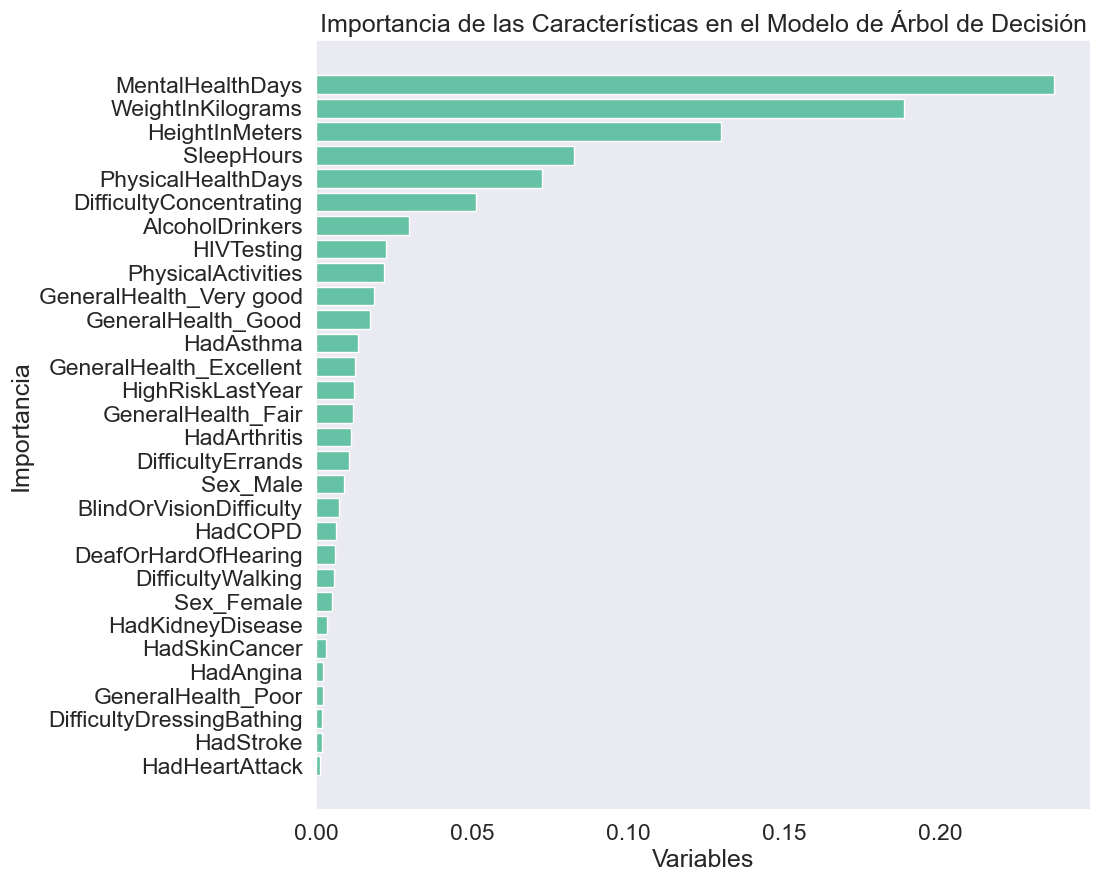

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x = model_data.drop(["GeneralHealth", "Sex", "AgeCategory", "HadDepressiveDisorder", "y"], axis=1)
y = model_data["y"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=8521)

clf = DecisionTreeClassifier(random_state=8521)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

importancia = clf.feature_importances_
features = x.columns
importancia_df = pd.DataFrame({"Features": features, "Importancia": importancia}).sort_values("Importancia", ascending=True)

plt.figure(figsize=(10, 10))
plt.barh(importancia_df["Features"], importancia_df["Importancia"])
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las Características en el Modelo de Árbol de Decisión')
plt.show()

Scoring Punto de corte .5:
Accuracy:  0.72
Recall:  0.47
Precision:  0.46


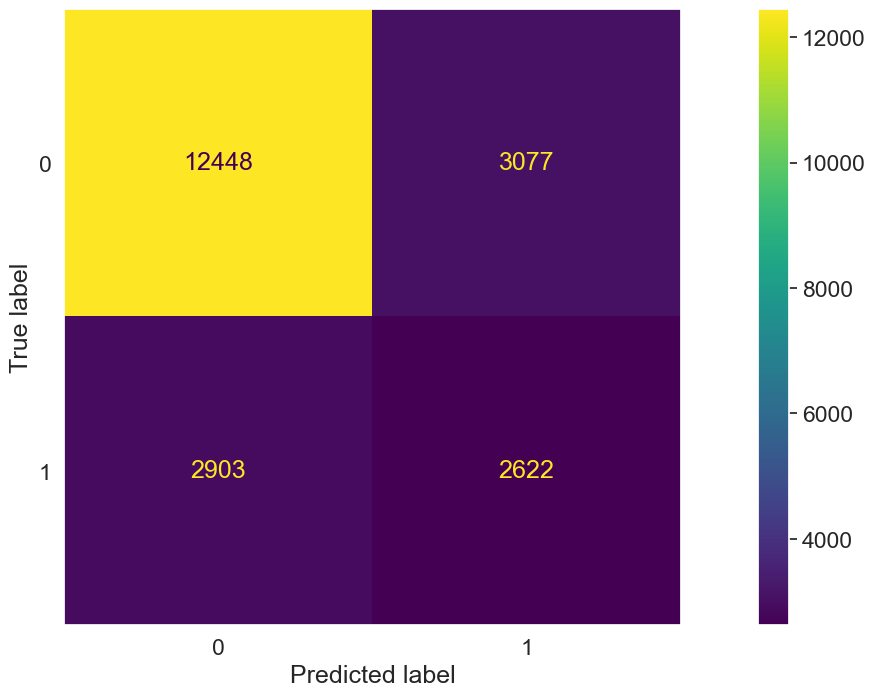

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score

conf = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=['0', '1'])
disp.plot(values_format='d') 

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Scoring Punto de corte .5:")
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))

###  KMeans

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [52]:
X = model_data.drop(["GeneralHealth", "Sex", "AgeCategory", "HadDepressiveDisorder", "y"], axis=1)
# estandarizo los valores de las X´s
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


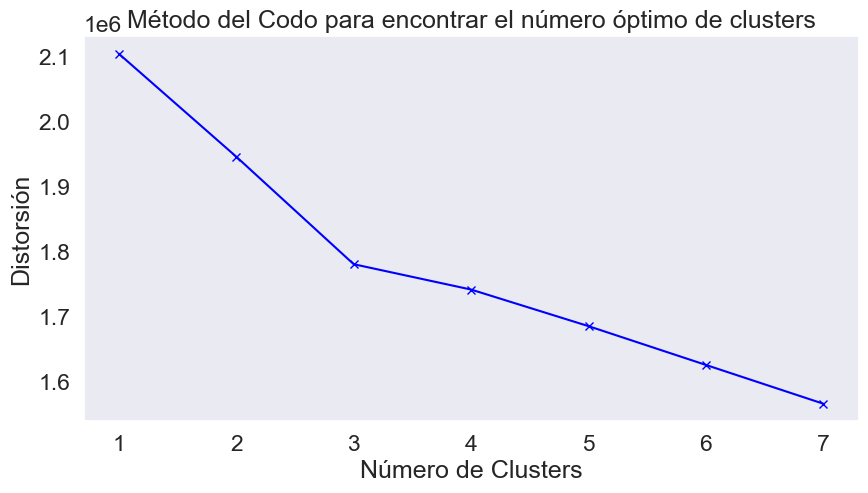

In [87]:
distortions = []
K = range(1, 8)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, distortions, "bx-")
plt.xlabel('Número de Clusters')
plt.ylabel('Distorsión')
plt.title('Método del Codo para encontrar el número óptimo de clusters')
plt.show()


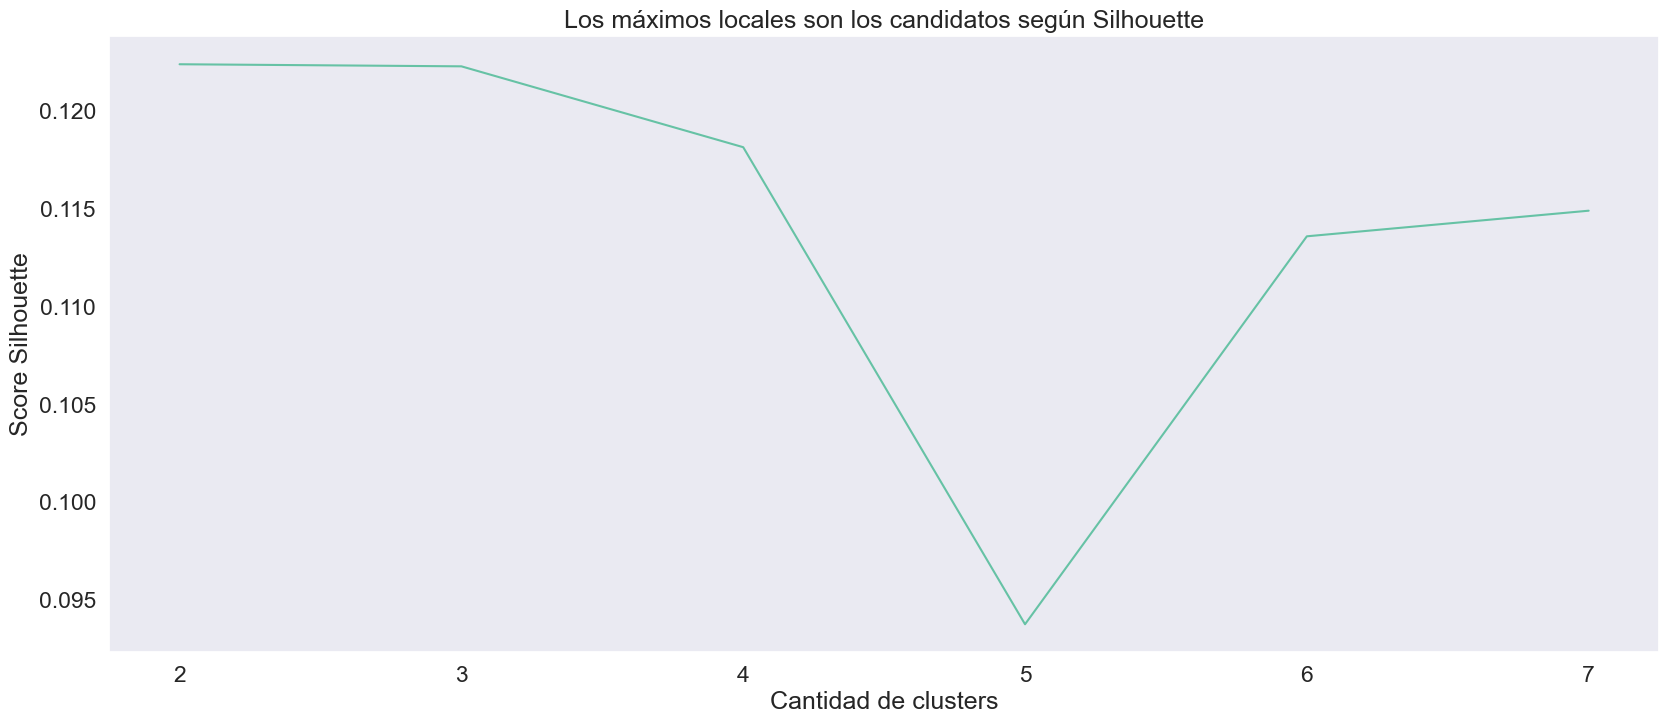

In [88]:
# from sklearn.cluster import KMeans

# Silhouette score: va entre -1 y 1 (1 es lo mejor).
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

silhouette_scores = []
rango_clusters = range(2,8)

for i in rango_clusters:
    # para cada valor de i, calculo kmeans y silhouette
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    
    sil_score = silhouette_score(X, labels=k_means.labels_)
    silhouette_scores.append(sil_score)

plt.plot(rango_clusters,silhouette_scores)
plt.xticks(rango_clusters)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score Silhouette')
plt.title('Los máximos locales son los candidatos según Silhouette')
plt.show()

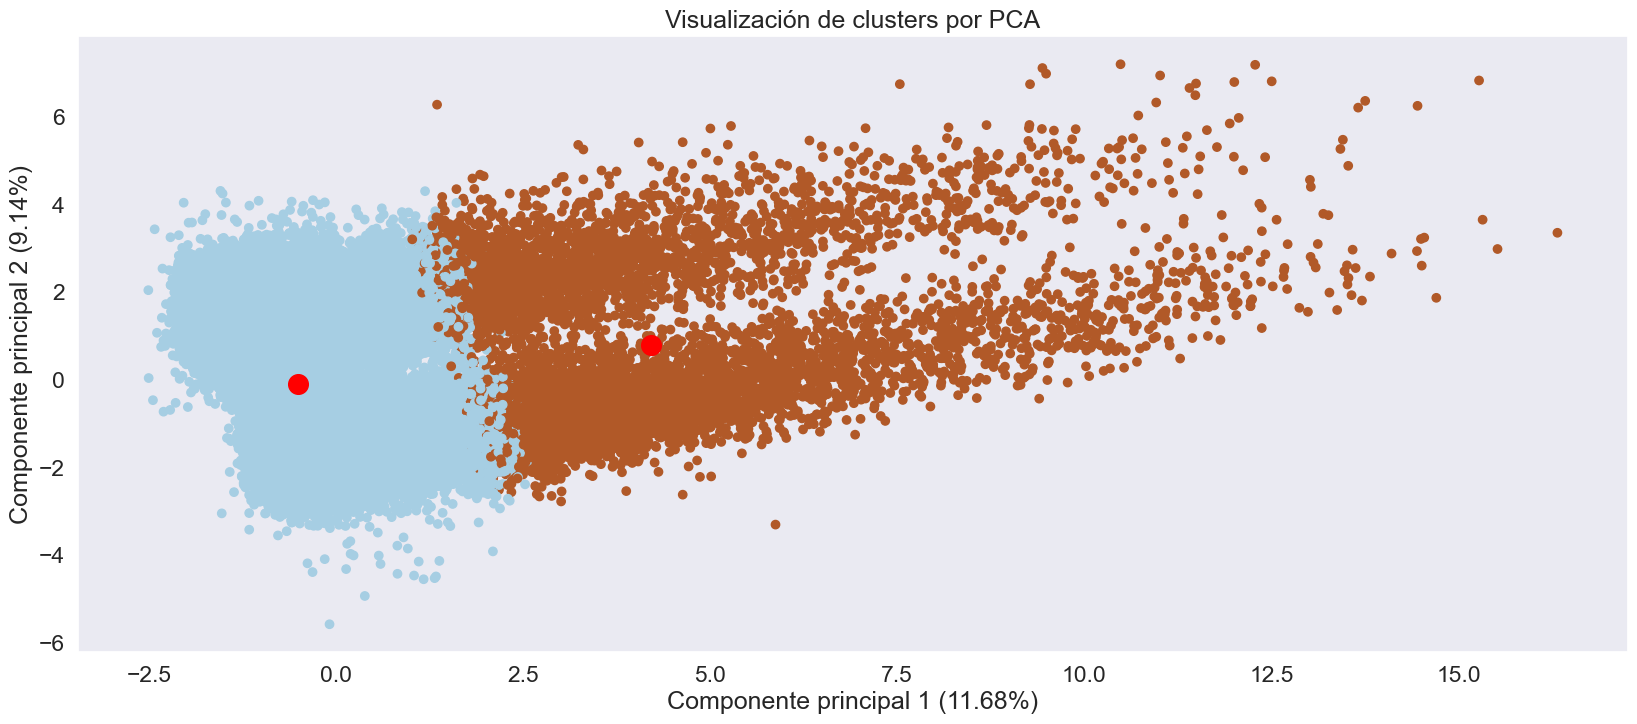

In [80]:
cant_clusters = 2
kmeans = KMeans(n_clusters=cant_clusters, random_state=0).fit(X)
y_kmeans = pd.Series(kmeans.predict(X))
# que me diga los centroides
centroides = kmeans.cluster_centers_
# transformo los centroides al plano PCA para poderlos graficar
centroides_pca = pca.transform(centroides)

vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)
# grafico en el plano PCA datos, clusters y centroides
plt.scatter(x_new[:,0],x_new[:,1], c=kmeans.labels_, cmap="Paired")
plt.scatter(centroides_pca[:,0],centroides_pca[:, 1], c="red", s=200)
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Visualización de clusters por PCA")
plt.show()

In [71]:
k2 = model_data.copy()
k2["Cluster"] = y_kmeans
k2.drop(["Sex", "GeneralHealth", "AgeCategory"], axis=1, inplace=True)
k2.groupby(["Cluster"]).mean()

PhysicalHealthDays  MentalHealthDays  PhysicalActivities  SleepHours  \
Cluster                                                                         
0.0                2.954083          6.046528            0.836066     6.82606   
1.0                3.016364          6.232727            0.825000     6.84000   

         HadHeartAttack  HadAngina  HadStroke  HadAsthma  HadSkinCancer  \
Cluster                                                                   
0.0            0.009172   0.007060   0.010006   0.168547       0.009561   
1.0            0.005455   0.004545   0.011364   0.174545       0.010909   

          HadCOPD  HadDepressiveDisorder  HadKidneyDisease  HadArthritis  \
Cluster                                                                    
0.0      0.024515               0.243871          0.012619      0.096059   
1.0      0.024545               0.235455          0.011818      0.094545   

         DeafOrHardOfHearing  BlindOrVisionDifficulty  \
Cluster                                                 
0.0                 0.024571                 0.028962   
1.0                 0.018636                 0.031364   

         DifficultyConcentrating  DifficultyWalking  \
Cluster                                               
0.0                     0.136973           0.041192   
1.0                     0.135000           0.043636   

         DifficultyDressingBathing  DifficultyErrands  HeightInMeters  \
Cluster                                                                 
0.0                       0.016510           0.053866        1.715884   
1.0                       0.016818           0.063182        1.715755   

         WeightInKilograms  AlcoholDrinkers  HIVTesting  HighRiskLastYear  \
Cluster                                                                     
0.0              83.283887         0.627050    0.462894          0.107065   
1.0              83.666414         0.643182    0.444091          0.112727   

         GeneralHealth_Excellent  GeneralHealth_Fair  GeneralHealth_Good  \
Cluster                                                                    
0.0                     0.218856            0.089332            0.302351   
1.0                     0.223636            0.094545            0.308636   

         GeneralHealth_Poor  GeneralHealth_Very good  Sex_Female  Sex_Male  \
Cluster                                                                      
0.0                0.020346                 0.369114    0.481628  0.518372   
1.0                0.012727                 0.360455    0.495909  0.504091   

                y  
Cluster            
0.0      0.243871  
1.0      0.235455

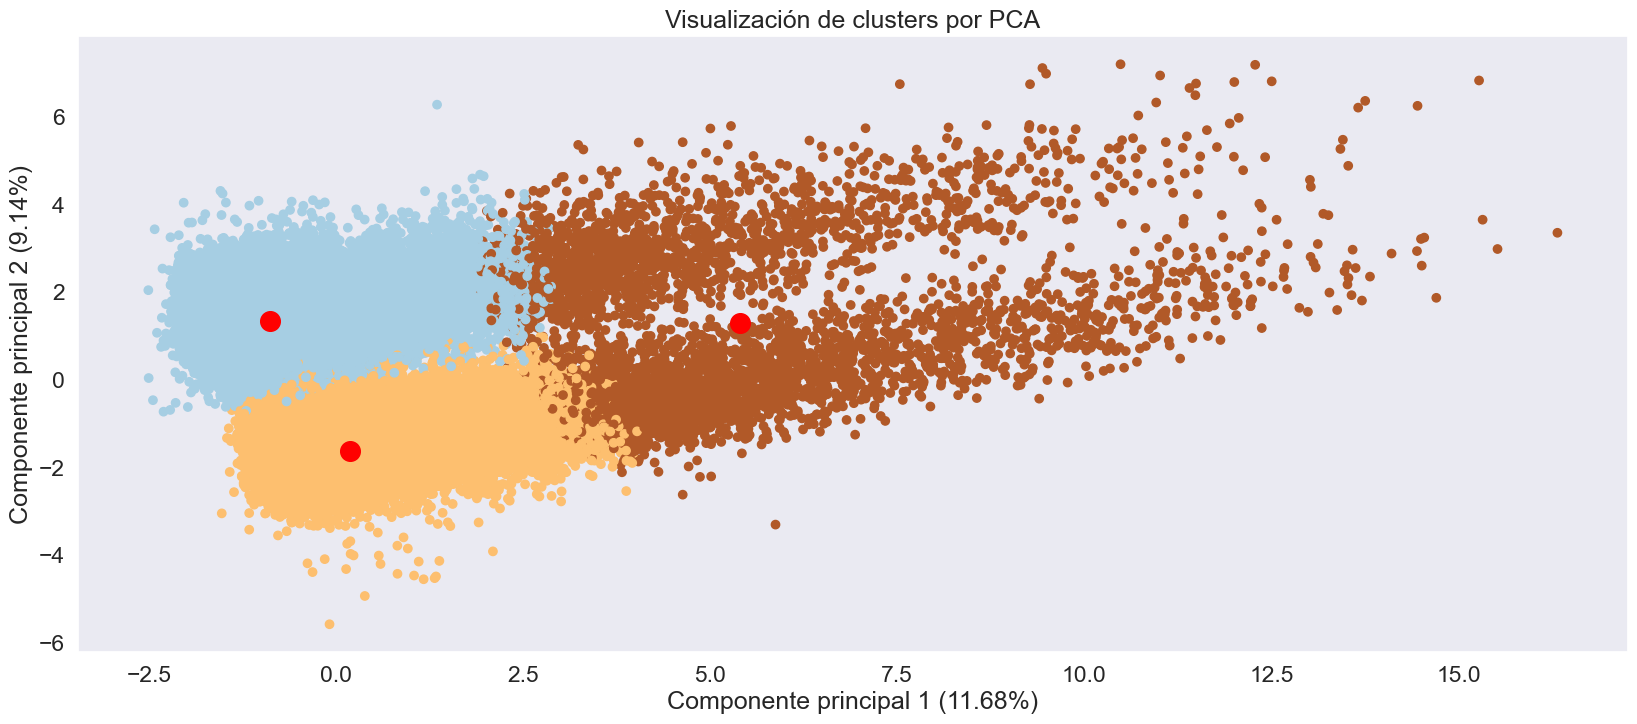

In [73]:
cant_clusters = 3
kmeans = KMeans(n_clusters=cant_clusters, random_state=0).fit(X)
y_kmeans = pd.Series(kmeans.predict(X))
# que me diga los centroides
centroides = kmeans.cluster_centers_
# transformo los centroides al plano PCA para poderlos graficar
centroides_pca = pca.transform(centroides)

vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)
# grafico en el plano PCA datos, clusters y centroides
plt.scatter(x_new[:,0],x_new[:,1], c=kmeans.labels_, cmap="Paired")
plt.scatter(centroides_pca[:,0],centroides_pca[:, 1], c="red", s=200)
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Visualización de clusters por PCA")
plt.show()

In [74]:
k3 = model_data.copy()
k3["Cluster"] = y_kmeans
k3.drop(["Sex", "GeneralHealth", "AgeCategory"], axis=1, inplace=True)
k3.groupby(["Cluster"]).mean()

PhysicalHealthDays  MentalHealthDays  PhysicalActivities  SleepHours  \
Cluster                                                                         
0.0                2.947299          6.055657            0.841692    6.818145   
1.0                2.984497          6.099615            0.828477    6.835294   
2.0                2.897196          5.919782            0.827882    6.845016   

         HadHeartAttack  HadAngina  HadStroke  HadAsthma  HadSkinCancer  \
Cluster                                                                   
0.0            0.008155   0.006728   0.010601   0.167482       0.009276   
1.0            0.009676   0.006927   0.009456   0.170203       0.010665   
2.0            0.007009   0.006231   0.011682   0.175234       0.006231   

          HadCOPD  HadDepressiveDisorder  HadKidneyDisease  HadArthritis  \
Cluster                                                                    
0.0      0.022630               0.244954          0.012130      0.093170   
1.0      0.026278               0.240352          0.013084      0.100275   
2.0      0.026480               0.246106          0.011682      0.085670   

         DeafOrHardOfHearing  BlindOrVisionDifficulty  \
Cluster                                                 
0.0                 0.021814                 0.029664   
1.0                 0.026828                 0.028917   
2.0                 0.019470                 0.028037   

         DifficultyConcentrating  DifficultyWalking  \
Cluster                                               
0.0                     0.137819           0.039755   
1.0                     0.136668           0.042881   
2.0                     0.129283           0.044393   

         DifficultyDressingBathing  DifficultyErrands  HeightInMeters  \
Cluster                                                                 
0.0                       0.016718           0.053823        1.715830   
1.0                       0.016383           0.055305        1.716035   
2.0                       0.016355           0.059969        1.715008   

         WeightInKilograms  AlcoholDrinkers  HIVTesting  HighRiskLastYear  \
Cluster                                                                     
0.0              83.407380         0.632314    0.465443          0.109990   
1.0              83.265912         0.624519    0.459923          0.106102   
2.0              83.123123         0.632399    0.432243          0.101246   

         GeneralHealth_Excellent  GeneralHealth_Fair  GeneralHealth_Good  \
Cluster                                                                    
0.0                     0.224771            0.087564            0.301325   
1.0                     0.211765            0.092798            0.305553   
2.0                     0.232087            0.087227            0.298287   

         GeneralHealth_Poor  GeneralHealth_Very good  Sex_Female  Sex_Male  \
Cluster                                                                      
0.0                0.020082                 0.366259    0.482671  0.517329   
1.0                0.019901                 0.369984    0.481693  0.518307   
2.0                0.012461                 0.369938    0.497664  0.502336   

                y  
Cluster            
0.0      0.244954  
1.0      0.240352  
2.0      0.246106